In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 2nd column is valence, 3rd column is arousal 

# 31 rows x 4 columns

In [ ]:
# /kaggle/input/raw-ppg-gsr-data-for-emotion-recognition

sample_arousal_valence = pd.read_csv("/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/10/10/Arousal_Valence.csv")
# sample_arousal_valence = pd.read_csv("/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/10/10/Arousal_Valence.csv")
print(sample_arousal_valence)

In [ ]:
sample_arousal_valence.shape

In [ ]:
# import pandas as pd

# sample_raw_gsr = pd.read_csv('/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/10/10/raw_gsr.csv', delimiter=',', encoding='latin1')
# # print(sample_raw_ppg)
# pd.read_csv("/kaggle/input/raw_data_ppg_gsr/10/10/Arousal_Valence.csv")
# with open('/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/10/10/raw_gsr.csv', 'r') as file:
with open('/kaggle/input/raw_data_ppg_gsr/10/10/raw_gsr.csv', 'r') as file:
    for _ in range(5):
        print(file.readline())
        
# sample_raw_gsr = pd.read_csv('/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/10/10/raw_gsr.csv')

In [ ]:
# with open('/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/10/10/raw_gsr.csv', 'r') as file:
with open('/kaggle/input/raw_data_ppg_gsr/10/10/raw_gsr.csv', 'r') as file:
    for i, line in enumerate(file):
        if 40 <= i <= 50:  # Print lines near the problematic line
            print(f"Line {i}: {line}")


3.
raw_gsr.csv: This CSV file contains the raw GSR data. For each line, the first item (if not null) represents the timestamp. The second item denotes the GSR data. The third item stores trigger information. Similar to camera.csv, we use k + 10 and k + 100 to indicate the start and stop of the k-th video, respectively.

4.
raw_ppg.csv: This CSV file contains the raw PPG data. The organization structure of PPG data is the same as GSR data in raw_gsr.csv. The only difference between raw_ppg.csv and raw_gsr.csv is the number of lines per second (100 lines per second for PPG and 4 lines for GSR due to different sampling rates).

In [ ]:
# with open('/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/10/10/raw_gsr.csv', 'r') as file:
with open('/kaggle/input/raw_data_ppg_gsr/10/10/raw_gsr.csv', 'r') as file:
    for _ in range(55):
        print(file.readline())

In [ ]:
# for gsr

# sample_raw_gsr = pd.read_csv(
#     '/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/10/10/raw_gsr.csv', 
#     names=['timestamp', 'gsr_value', 'extra_column'],  # Define expected columns
#     na_values=[''],  # Treat empty strings as NaN
#     skiprows=1  # Skip header if needed
# )

sample_raw_gsr = pd.read_csv(
    '/kaggle/input/raw_data_ppg_gsr/10/10/raw_gsr.csv', 
    names=['timestamp', 'gsr_value', 'start_stop_trigger'],  # Define expected columns
    na_values=[''],  # Treat empty strings as NaN
#     skiprows=1  # Skip header if needed
)

In [ ]:
# Get unique start_stop_triggers
unique_triggers = sample_raw_gsr['start_stop_trigger'].unique().tolist()

# Find the positions (row numbers) of each unique start_stop_trigger
trigger_positions = {trigger: sample_raw_gsr[sample_raw_gsr['start_stop_trigger'] == trigger].index.tolist()
                     for trigger in unique_triggers}

# Print the results
print("Unique start_stop_triggers:", unique_triggers)
print("Positions of start_stop_triggers:", trigger_positions)

In [ ]:
print(sample_raw_gsr)

In [ ]:
# import pandas as pd

# # Load the raw GSR data
# sample_raw_gsr = pd.read_csv('/kaggle/input/raw_data_ppg_gsr/10/10/raw_gsr.csv',
#                              names=['timestamp', 'gsr_value', 'start_stop_trigger'],
#                              na_values=[''])

# # Load the Arousal_Valence ratings
# arousal_valence_df = pd.read_csv('/kaggle/input/raw_data_ppg_gsr/10/10/Arousal_Valence.csv', 
#                                  names=['video_id', 'valence', 'arousal', 'dominance'])

# # Dictionary to store data intervals for each video ID
# data_intervals = {}

# for k in range(32):  # video IDs from 0 to 31
#     # Define start and stop triggers
#     start_trigger = k + 10
#     stop_trigger = k + 100

#     # Find the row indices for start and stop triggers
#     start_index = sample_raw_gsr[sample_raw_gsr['start_stop_trigger'] == start_trigger].index
#     stop_index = sample_raw_gsr[sample_raw_gsr['start_stop_trigger'] == stop_trigger].index

#     # Ensure start and stop triggers exist and capture the interval
#     if not start_index.empty and not stop_index.empty:
#         interval_data = sample_raw_gsr.loc[start_index[0]:stop_index[0], ['timestamp', 'gsr_value']]
#         data_intervals[k] = interval_data  # Store interval data for video ID k

# # Print or use data_intervals as needed to analyze arousal and valence correlations
# # Print each interval data for each video ID
# for video_id, interval_data in data_intervals.items():
#     print(f"Video ID: {video_id}")
#     print(interval_data)
#     print("\n" + "="*50 + "\n")  # Separator between intervals

In [ ]:
import pandas as pd

# Load the raw GSR data
sample_raw_gsr = pd.read_csv('/kaggle/input/raw_data_ppg_gsr/10/10/raw_gsr.csv',
                             names=['timestamp', 'gsr_value', 'start_stop_trigger'],
                             na_values=[''])

# Load the Arousal_Valence ratings
arousal_valence_df = pd.read_csv('/kaggle/input/raw_data_ppg_gsr/10/10/Arousal_Valence.csv', 
                                 names=['video_id', 'valence', 'arousal', 'dominance'])

# Dictionary to store data intervals with arousal and valence labels for each video ID
data_intervals_with_labels = {}

for k in range(32):  # video IDs from 0 to 31
    # Define start and stop triggers
    start_trigger = k + 10
    stop_trigger = k + 100

    # Find the row indices for start and stop triggers
    start_index = sample_raw_gsr[sample_raw_gsr['start_stop_trigger'] == start_trigger].index
    stop_index = sample_raw_gsr[sample_raw_gsr['start_stop_trigger'] == stop_trigger].index

    # Ensure start and stop triggers exist and capture the interval
    if not start_index.empty and not stop_index.empty:
        interval_data = sample_raw_gsr.loc[start_index[0]:stop_index[0], ['timestamp', 'gsr_value']]

        # Retrieve the arousal and valence values for the current video ID
        valence = arousal_valence_df.loc[arousal_valence_df['video_id'] == k, 'valence'].values[0]
        arousal = arousal_valence_df.loc[arousal_valence_df['video_id'] == k, 'arousal'].values[0]

        # Store interval data along with valence and arousal labels
        data_intervals_with_labels[k] = {
            'gsr_data': interval_data,
            'valence': valence,
            'arousal': arousal
        }

# Print the GSR data intervals with their corresponding valence and arousal values
for video_id, data in data_intervals_with_labels.items():
    print(f"Video ID: {video_id}")
    print("Valence:", data['valence'])
    print("Arousal:", data['arousal'])
    print("GSR Data:")
    print(data['gsr_data'])
    print("\n" + "="*50 + "\n")  # Separator between intervals


# Use start stop triggers to match data time intervals

In [ ]:
import pandas as pd

# Load the raw PPG data
sample_raw_ppg = pd.read_csv('/kaggle/input/raw_data_ppg_gsr/10/10/raw_ppg.csv',
                             names=['timestamp', 'ppg_value', 'start_stop_trigger'],
                             na_values=[''])

# Load the Arousal_Valence ratings
arousal_valence_df = pd.read_csv('/kaggle/input/raw_data_ppg_gsr/10/10/Arousal_Valence.csv', 
                                 names=['video_id', 'valence', 'arousal', 'dominance'])

# Dictionary to store data intervals with arousal and valence labels for each video ID
ppg_data_intervals_with_labels = {}

for k in range(32):  # video IDs from 0 to 31
    # Define start and stop triggers
    start_trigger = k + 10
    stop_trigger = k + 100

    # Find the row indices for start and stop triggers
    start_index = sample_raw_ppg[sample_raw_ppg['start_stop_trigger'] == start_trigger].index
    stop_index = sample_raw_ppg[sample_raw_ppg['start_stop_trigger'] == stop_trigger].index

    # Ensure start and stop triggers exist and capture the interval
    if not start_index.empty and not stop_index.empty:
        interval_data = sample_raw_ppg.loc[start_index[0]:stop_index[0], ['timestamp', 'ppg_value']]

        # Retrieve the arousal and valence values for the current video ID
        valence = arousal_valence_df.loc[arousal_valence_df['video_id'] == k, 'valence'].values[0]
        arousal = arousal_valence_df.loc[arousal_valence_df['video_id'] == k, 'arousal'].values[0]

        # Store interval data along with valence and arousal labels
        ppg_data_intervals_with_labels[k] = {
            'ppg_data': interval_data,
            'valence': valence,
            'arousal': arousal
        }

# Print the PPG data intervals with their corresponding valence and arousal values
for video_id, data in ppg_data_intervals_with_labels.items():
    print(f"Video ID: {video_id}")
    print("Valence:", data['valence'])
    print("Arousal:", data['arousal'])
    print("PPG Data:")
    print(data['ppg_data'])
    print("\n" + "="*50 + "\n")  # Separator between intervals


# No need to run this as the data and categories as stored in text file
# Iterate through all subject folders and obtain their data intervals based on start stop trigger & arousal and valence
 
# Not normalized - need this for time & frequency domain features extraction, apply standard scaler after train test split

In [ ]:
import os
import pandas as pd

base_dir = '/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/'
data_intervals_not_normalized = []

# Function to load and process PPG or GSR data
def load_sensor_data(file_path, start_trigger, stop_trigger, value_column):
    data = pd.read_csv(file_path, names=['timestamp', value_column, 'start_stop_trigger'], na_values=[''])
    start_index = data[data['start_stop_trigger'] == start_trigger].index
    stop_index = data[data['start_stop_trigger'] == stop_trigger].index
    if not start_index.empty and not stop_index.empty:
        return data.loc[start_index[0]:stop_index[0], value_column].values
    else:
        return None

# Mapping function for arousal and valence levels
def map_level(value):
    if 1 <= value <= 3:
        return 'L'  # Low
    elif 4 <= value <= 6:
        return 'M'  # Medium
    elif 7 <= value <= 9:
        return 'H'  # High
    
# Iterate over each subject's folder
for subject_id in os.listdir(base_dir):
    subject_path = os.path.join(base_dir, subject_id, subject_id)
    
    # Check if the folder name is purely numeric (indicating a subject)
    if os.path.isdir(subject_path) and subject_id.isdigit():
        
        # Load arousal and valence labels for this subject
        arousal_valence_path = os.path.join(subject_path, 'Arousal_Valence.csv')
        arousal_valence_df = pd.read_csv(arousal_valence_path, names=['video_id', 'valence', 'arousal', 'dominance'])
        
        # Paths to GSR and PPG data files
        gsr_path = os.path.join(subject_path, 'raw_gsr.csv')
        ppg_path = os.path.join(subject_path, 'raw_ppg.csv')

        # Only process if both GSR and PPG data files exist
        if os.path.exists(gsr_path) and os.path.exists(ppg_path):

            for k in range(32):  # Loop over each video ID's start/stop triggers
                start_trigger = k + 10
                stop_trigger = k + 100

                # Load GSR data interval
                gsr_interval = load_sensor_data(gsr_path, start_trigger, stop_trigger, 'gsr_value')

                # Load PPG data interval
                ppg_interval = load_sensor_data(ppg_path, start_trigger, stop_trigger, 'ppg_value')

                # Check if intervals are valid and retrieve labels
                if gsr_interval is not None and ppg_interval is not None:
                    valence = arousal_valence_df.loc[arousal_valence_df['video_id'] == k, 'valence'].values[0]
                    arousal = arousal_valence_df.loc[arousal_valence_df['video_id'] == k, 'arousal'].values[0]
                    
                    # Map arousal and valence to Low, Medium, High
                    arousal_level = map_level(arousal)
                    valence_level = map_level(valence)
                    arousal_valence_label = f"A{arousal_level}V{valence_level}"

                    # Convert GSR and PPG data to comma-separated strings
                    gsr_data_str = ",".join(map(str, gsr_interval))
                    ppg_data_str = ",".join(map(str, ppg_interval))

                    # Append data to the intervals list for model input
                    data_intervals_not_normalized.append({
                        'subject_id': subject_id,
                        'video_id': k,
                        'gsr_data': gsr_data_str,  # Store as comma-separated string
                        'ppg_data': ppg_data_str,  # Store as comma-separated string
                        'valence': valence,
                        'arousal': arousal,
                        'arousal_level': arousal_level,
                        'valence_level': valence_level,
                        'arousal_valence_label': arousal_valence_label  # Store arousal_valence_label
                    })

# Print a few samples to verify data
for data in data_intervals_not_normalized[:5]:  # Print first 5 samples as a check
    print(f"Subject ID: {data['subject_id']}, Video ID: {data['video_id']}")
    print("Valence:", data['valence'])
    print("Arousal:", data['arousal'])
    print("GSR Data:", data['gsr_data'])
    print("PPG Data:", data['ppg_data'])
    print("Arousal Valence Label:", data['arousal_valence_label'])  # Print the label
    print("\n" + "="*50 + "\n")  # Separator between samples


In [ ]:
# print(len(data))

In [ ]:
print(len(data_intervals_not_normalized))

# Save to text file and csv file

In [ ]:

import os
import pandas as pd


# Define a path to save the files in the working directory
output_dir = '/kaggle/working/'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Save the data_intervals to a TXT file (saving as a readable string format)
def save_to_txt(data_intervals, filename='data_intervals_not_normalized1.txt'):
    file_path = os.path.join(output_dir, filename)
    with open(file_path, 'w') as f:
        for item in data_intervals:
            f.write(str(item) + "\n\n")  # Each dictionary entry on a new line with a space between them
    print(f"Data saved to {file_path}")

# Save the data_intervals to text format

save_to_txt(data_intervals_not_normalized)


print("Data saved to .txt file in Kaggle working directory.")



# Convert the data_intervals list of dictionaries to a DataFrame
data_intervals_dataframe = pd.DataFrame(data_intervals_not_normalized)

# Save the DataFrame to a CSV file
data_intervals_dataframe.to_csv('data_intervals_not_normalized1.csv', index=False)

print("Data saved to data_intervals_not_normalized1.csv")

# Specify the path to the CSV file
file_path = '/kaggle/working/data_intervals_not_normalized1.csv'

# Read the CSV file into a DataFrame
data_intervals_not_normalized = pd.read_csv(file_path)

# # Display the first few rows to verify
# print(data_intervals_not_normalized1.head())


In [ ]:
# Display the first few rows to verify
print(data_intervals_not_normalized.head())

In [ ]:
data_intervals_not_normalized.shape

# Normalized PPG and GSR data for each sequence & using numerical values

In [ ]:
# import os
# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# base_dir = '/kaggle/input/raw_data_ppg_gsr/'
# data_intervals = []

# # Function to load and process PPG or GSR data
# def load_sensor_data(file_path, start_trigger, stop_trigger, value_column):
#     data = pd.read_csv(file_path, names=['timestamp', value_column, 'start_stop_trigger'], na_values=[''])
#     start_index = data[data['start_stop_trigger'] == start_trigger].index
#     stop_index = data[data['start_stop_trigger'] == stop_trigger].index
#     if not start_index.empty and not stop_index.empty:
#         return data.loc[start_index[0]:stop_index[0], value_column].values
#     else:
#         return None

# # Initialize scalers for PPG and GSR data
# scaler_ppg = StandardScaler()
# scaler_gsr = StandardScaler()

# # Iterate over each subject's folder
# for subject_id in os.listdir(base_dir):
#     subject_path = os.path.join(base_dir, subject_id, subject_id)
    
#     # Check if the folder name is purely numeric (indicating a subject)
#     if os.path.isdir(subject_path) and subject_id.isdigit():
        
#         # Load arousal and valence labels for this subject
#         arousal_valence_path = os.path.join(subject_path, 'Arousal_Valence.csv')
#         arousal_valence_df = pd.read_csv(arousal_valence_path, names=['video_id', 'valence', 'arousal', 'dominance'])
        
#         # Paths to GSR and PPG data files
#         gsr_path = os.path.join(subject_path, 'raw_gsr.csv')
#         ppg_path = os.path.join(subject_path, 'raw_ppg.csv')

#         # Only process if both GSR and PPG data files exist
#         if os.path.exists(gsr_path) and os.path.exists(ppg_path):

#             for k in range(32):  # Loop over each video ID's start/stop triggers
#                 start_trigger = k + 10
#                 stop_trigger = k + 100

#                 # Load GSR data interval
#                 gsr_interval = load_sensor_data(gsr_path, start_trigger, stop_trigger, 'gsr_value')

#                 # Load PPG data interval
#                 ppg_interval = load_sensor_data(ppg_path, start_trigger, stop_trigger, 'ppg_value')

#                 # Check if intervals are valid and retrieve labels
#                 if gsr_interval is not None and ppg_interval is not None:
#                     valence = arousal_valence_df.loc[arousal_valence_df['video_id'] == k, 'valence'].values[0]
#                     arousal = arousal_valence_df.loc[arousal_valence_df['video_id'] == k, 'arousal'].values[0]

#                     # Normalize the PPG and GSR data using the scalers
#                     normalized_ppg = scaler_ppg.fit_transform(ppg_interval.reshape(-1, 1)).flatten()
#                     normalized_gsr = scaler_gsr.fit_transform(gsr_interval.reshape(-1, 1)).flatten()

#                     # Append data to the intervals list for model input
#                     data_intervals.append({
#                         'subject_id': subject_id,
#                         'video_id': k,
#                         'gsr_data': normalized_gsr,
#                         'ppg_data': normalized_ppg,
#                         'valence': valence,
#                         'arousal': arousal
#                     })

# # Print a few samples to verify data
# for data in data_intervals[:5]:  # Print first 5 samples as a check
#     print(f"Subject ID: {data['subject_id']}, Video ID: {data['video_id']}")
#     print("Valence:", data['valence'])
#     print("Arousal:", data['arousal'])
#     print("Normalized GSR Data:", data['gsr_data'])
#     print("Normalized PPG Data:", data['ppg_data'])
#     print("\n" + "="*50 + "\n")  # Separator between samples

# # The data_intervals list now contains input sequences and labels for multi-input LSTM

# print(data)


In [ ]:
# print(len(data_intervals))

# Save data_intervals to text file to load for future use

In [ ]:
# import json
# import os

# # Define a path to save the files in the working directory
# output_dir = '/kaggle/working/'

# # Ensure the output directory exists
# os.makedirs(output_dir, exist_ok=True)

# # # Save the data_intervals to a JSON file
# # def save_to_json(data_intervals, filename='data_intervals.json'):
# #     file_path = os.path.join(output_dir, filename)
# #     with open(file_path, 'w') as f:
# #         json.dump(data_intervals, f)
# #     print(f"Data saved to {file_path}")

# # Save the data_intervals to a TXT file (saving as a readable string format)
# def save_to_txt(data_intervals, filename='data_intervals.txt'):
#     file_path = os.path.join(output_dir, filename)
#     with open(file_path, 'w') as f:
#         for item in data_intervals:
#             f.write(str(item) + "\n\n")  # Each dictionary entry on a new line with a space between them
#     print(f"Data saved to {file_path}")

# # Save the data_intervals to both formats
# # save_to_json(data_intervals)
# save_to_txt(data_intervals)

# # print("Data saved to both .json and .txt files.")
# print("Data saved to .txt file in Kaggle working directory.")



# Normalized PPG & GSR data with 

In [ ]:
# import os
# import pandas as pd
# import json
# from sklearn.preprocessing import StandardScaler

# base_dir = '/kaggle/input/raw_data_ppg_gsr/'
# data_intervals = []

# # Function to load and process PPG or GSR data
# def load_sensor_data(file_path, start_trigger, stop_trigger, value_column):
#     data = pd.read_csv(file_path, names=['timestamp', value_column, 'start_stop_trigger'], na_values=[''])
#     start_index = data[data['start_stop_trigger'] == start_trigger].index
#     stop_index = data[data['start_stop_trigger'] == stop_trigger].index
#     if not start_index.empty and not stop_index.empty:
#         return data.loc[start_index[0]:stop_index[0], value_column].values
#     else:
#         return None

# # Initialize scalers for PPG and GSR data
# scaler_ppg = StandardScaler()
# scaler_gsr = StandardScaler()

# # Mapping function for arousal and valence levels
# def map_level(value):
#     if 1 <= value <= 3:
#         return 'L'  # Low
#     elif 4 <= value <= 6:
#         return 'M'  # Medium
#     elif 7 <= value <= 9:
#         return 'H'  # High

# # Iterate over each subject's folder
# for subject_id in os.listdir(base_dir):
#     subject_path = os.path.join(base_dir, subject_id, subject_id)
    
#     # Check if the folder name is purely numeric (indicating a subject)
#     if os.path.isdir(subject_path) and subject_id.isdigit():
        
#         # Load arousal and valence labels for this subject
#         arousal_valence_path = os.path.join(subject_path, 'Arousal_Valence.csv')
#         arousal_valence_df = pd.read_csv(arousal_valence_path, names=['video_id', 'valence', 'arousal', 'dominance'])
        
#         # Paths to GSR and PPG data files
#         gsr_path = os.path.join(subject_path, 'raw_gsr.csv')
#         ppg_path = os.path.join(subject_path, 'raw_ppg.csv')

#         # Only process if both GSR and PPG data files exist
#         if os.path.exists(gsr_path) and os.path.exists(ppg_path):

#             for k in range(32):  # Loop over each video ID's start/stop triggers
#                 start_trigger = k + 10
#                 stop_trigger = k + 100

#                 # Load GSR data interval
#                 gsr_interval = load_sensor_data(gsr_path, start_trigger, stop_trigger, 'gsr_value')

#                 # Load PPG data interval
#                 ppg_interval = load_sensor_data(ppg_path, start_trigger, stop_trigger, 'ppg_value')

#                 # Check if intervals are valid and retrieve labels
#                 if gsr_interval is not None and ppg_interval is not None:
#                     valence = arousal_valence_df.loc[arousal_valence_df['video_id'] == k, 'valence'].values[0]
#                     arousal = arousal_valence_df.loc[arousal_valence_df['video_id'] == k, 'arousal'].values[0]

#                     # Map arousal and valence to Low, Medium, High
#                     arousal_level = map_level(arousal)
#                     valence_level = map_level(valence)
#                     arousal_valence_label = f"A{arousal_level}V{valence_level}"

#                     # Normalize the PPG and GSR data using the scalers
#                     normalized_ppg = scaler_ppg.fit_transform(ppg_interval.reshape(-1, 1)).flatten()
#                     normalized_gsr = scaler_gsr.fit_transform(gsr_interval.reshape(-1, 1)).flatten()

#                     # Append data to the intervals list for model input
#                     data_intervals.append({
#                         'subject_id': subject_id,
#                         'video_id': k,
#                         'gsr_data': normalized_gsr.tolist(),
#                         'ppg_data': normalized_ppg.tolist(),
#                         'valence': valence,
#                         'arousal': arousal,
#                         'arousal_level': arousal_level,
#                         'valence_level': valence_level,
#                         'arousal_valence_label': arousal_valence_label
#                     })

# # # Save data_intervals to a .txt file
# # output_path = '/kaggle/working/data_intervals_with_categories.txt'
# # with open(output_path, 'w') as f:
# #     json.dump(data_intervals, f)

# # Function to load data_intervals from the .txt file
# def load_data_intervals(file_path):
#     with open(file_path, 'r') as f:
#         loaded_data = json.load(f)
#     return loaded_data

# # Example usage of load_data_intervals
# loaded_data_intervals = load_data_intervals(output_path)
# # print("Loaded Data Intervals Sample:", loaded_data_intervals[:1])  # Print first sample as a check


# No need to do this as preprocessed data is now stored in text file
# Save to text file

In [ ]:
# import os

# # Define a path to save the files in the working directory
# output_dir = '/kaggle/working/'

# # Ensure the output directory exists
# os.makedirs(output_dir, exist_ok=True)



# # Save the data_intervals to a TXT file (saving as a readable string format)
# def save_to_txt(data_intervals, filename='data_intervals_with_categories.txt'):
#     file_path = os.path.join(output_dir, filename)
#     with open(file_path, 'w') as f:
#         for item in data_intervals:
#             f.write(str(item) + "\n\n")  # Each dictionary entry on a new line with a space between them
#     print(f"Data saved to {file_path}")


# save_to_txt(data_intervals)

# # print("Data saved to both .json and .txt files.")
# print("Data saved to .txt file in Kaggle working directory.")

In [ ]:
# import os

# # Define a path to save the files in the working directory
# output_dir = '/kaggle/working/'

# # Ensure the output directory exists
# os.makedirs(output_dir, exist_ok=True)

In [ ]:
# print(len(data_intervals))

# If loading from input directory [ will work only after uploading the text file as input ]

In [ ]:
# # # Load data from JSON file
# # def load_from_json(filename='data_intervals.json'):
# #     with open(filename, 'r') as f:
# #         return json.load(f)

# # Load data from TXT file
# def load_from_txt(filename='/kaggle/input/multimodal-dataset-data-intervals-categories/data_intervals_with_categories.txt'):
#     with open(filename, 'r') as f:
#         data = f.readlines()
#     return [eval(item.strip()) for item in data if item.strip()]  # Convert string representations back to dictionaries

# # # Example of loading the saved data
# # data_from_json = load_from_json()  # Load data from JSON file
# data_from_txt = load_from_txt()    # Load data from TXT file

# # print("Data loaded from JSON:", data_from_json[:1])  # Print first item from loaded JSON data
# print("Data loaded from TXT:", data_from_txt[:1])    # Print first item from loaded TXT data

# data_intervals = data_from_txt

# print(len(data_intervals))



# Convert to dataframe and csv file

In [ ]:
# import pandas as pd

# # Convert the data_intervals list of dictionaries to a DataFrame
# data_intervals_dataframe = pd.DataFrame(data_intervals)

# # Save the DataFrame to a CSV file
# data_intervals_dataframe.to_csv('data_intervals.csv', index=False)

# print("Data saved to data_intervals.csv")


# LOAD THE CSV FILE HERE

In [1]:
import pandas as pd

# Specify the path to the CSV file
file_path = '/kaggle/input/data-intervals-not-normalized-with-labels/data_intervals_not_normalized1.csv'

# Read the CSV file into a DataFrame
data_intervals_dataframe = pd.read_csv(file_path)

# Display the first few rows to verify
print(data_intervals_dataframe.head())



   subject_id  video_id                                           gsr_data  \
0           7         0  179125.171875,178570.375,179391.03125,181556.2...   
1           7         1  182172.671875,182666.59375,183080.09375,184354...   
2           7         2  168857.21875,168781.234375,169132.53125,169823...   
3           7         3  178895.96875,178088.4375,177970.546875,177919....   
4           7         4  195028.421875,195278.421875,195498.46875,19572...   

                                            ppg_data  valence  arousal  \
0  612293.0,611442.0,610770.0,610083.0,609360.0,6...        4        5   
1  551232.0,551091.0,550905.0,550746.0,550549.0,5...        3        5   
2  605678.0,605853.0,606119.0,606351.0,606579.0,6...        4        5   
3  565274.0,565598.0,566007.0,566224.0,566272.0,5...        5        6   
4  549417.0,549378.0,549404.0,549342.0,549404.0,5...        6        6   

  arousal_level valence_level arousal_valence_label  
0             M             M   

In [ ]:
print(data_intervals_dataframe.arousal_valence_label.nunique())
print(data_intervals_dataframe.valence_level.nunique())
print(data_intervals_dataframe.arousal_level.nunique())

print(data_intervals_dataframe.valence_level.nunique())
print(data_intervals_dataframe.arousal_level.nunique())

print(data_intervals_dataframe.valence.nunique())
print(data_intervals_dataframe.arousal.nunique())

print(data_intervals_dataframe.shape)


In [ ]:
print("subject id:")
print(data_intervals_dataframe.subject_id.unique())
print("=================")
print("Video id:")
print(data_intervals_dataframe.video_id.unique())

# For PPG data extract features based on these steps :

1. Filter data with savgol filter

In [4]:
from scipy.signal import savgol_filter
import pandas as pd

# Assume data_intervals_dataframe is already loaded from the CSV
# Convert ppg_data column from string representations of lists to actual lists
# data_intervals_dataframe['ppg_data'] = data_intervals_dataframe['ppg_data'].apply(eval)
# Check if the value is a string and apply eval only in that case
data_intervals_dataframe['ppg_data'] = data_intervals_dataframe['ppg_data'].apply(
    lambda x: eval(x) if isinstance(x, str) else x
)

# Apply Savitzky-Golay filter to each entry in the 'ppg_data' column
preprocessed_dataframe = data_intervals_dataframe.copy()
preprocessed_dataframe['ppg_filtered_data'] = preprocessed_dataframe['ppg_data'].apply(
    lambda x: savgol_filter(x, window_length=5, polyorder=3) if len(x) >= 5 else x
)

# Drop the original 'ppg_data' column if you no longer need it
preprocessed_dataframe = preprocessed_dataframe.drop(columns=['ppg_data'])

# Save the new dataframe to a CSV if needed
preprocessed_dataframe.to_csv('/kaggle/working/preprocessed_data_intervals.csv', index=False)


In [5]:
print(preprocessed_dataframe)

      subject_id  video_id                                           gsr_data  \
0              7         0  179125.171875,178570.375,179391.03125,181556.2...   
1              7         1  182172.671875,182666.59375,183080.09375,184354...   
2              7         2  168857.21875,168781.234375,169132.53125,169823...   
3              7         3  178895.96875,178088.4375,177970.546875,177919....   
4              7         4  195028.421875,195278.421875,195498.46875,19572...   
...          ...       ...                                                ...   
2331          73        27  235083.5,235510.375,235109.140625,234961.0,234...   
2332          73        28  234302.875,235212.921875,234673.390625,234568....   
2333          73        29  234887.546875,234301.828125,234304.59375,23398...   
2334          73        30  234102.984375,233839.90625,233937.96875,234354...   
2335          73        31  233566.328125,233756.46875,233891.53125,234115...   

      valence  arousal arou

In [ ]:
# Increase window length to see a noticeable smoothing effect
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

# # Example of updating the preprocessed_dataframe with more noticeable filter
# preprocessed_dataframe['ppg_filtered_data'] = data_intervals_dataframe['ppg_data'].apply(
#     lambda x: savgol_filter(x, window_length=11, polyorder=3) if len(x) >= 11 else x
# )
sample_index = 53
# Print the first few values for debugging
print("Original PPG data:", data_intervals_dataframe.loc[sample_index, 'ppg_data'][:10])
print("Filtered PPG data:", preprocessed_dataframe.loc[sample_index, 'ppg_filtered_data'][:10])

# Now, re-plot
sample_index = 53
original_ppg_data = data_intervals_dataframe.loc[sample_index, 'ppg_data']
filtered_ppg_data = preprocessed_dataframe.loc[sample_index, 'ppg_filtered_data']

plt.figure(figsize=(12, 6))
plt.plot(original_ppg_data, label='Original PPG Data', color='blue')
plt.plot(filtered_ppg_data, label='Filtered PPG Data (Savitzky-Golay)', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('PPG Signal')
plt.legend()
plt.title('Comparison of Original and Filtered PPG Data')
plt.show()


# Calculate Features


Calculate Following features:
1. mean
2. median
3. maximum
4. variance
5. standard deviation
6. maximum
7. minimum

Time Domain Features:

1. ranges
2. rmssd: root mean square of successive differences
3. sdsd : standard deviation of successive differences
4. nni_50: number of normal-to-normal intervals greater than 50ms
5. pnni_50: proportion of normal-to-normal intervals > 50ms
6. nni_20: number of normal-to-normal intervals greater than 20ms. Count of successive heartbeats where time difference exceeds 20ms
7. pnni_20: proportion of normal-to-normal intervals greater than 20ms
8. avg_hr
9. std_hr
10. min_hr
11. max_hr
12. energy
13. abs_sum_diff

In [15]:
def ranges(x):
    return x.max() - x.min()

def rmssd(x):
    return np.sqrt(np.mean(np.diff(x)**2))

def sdsd(x):
    return st.stdev(np.diff(x))

def nni_50(x):
    return sum(np.abs(np.diff(x)) > 50)

def pnni_50(x):
    return 100* nni_50(x) / len(x)

def nni_20(x):
    return sum(np.abs(np.diff(x)) >20)

def pnni_20(x):
    return 100 * nni_20(x) / len(x)

def avg_hr(x):
    return st.mean(60000/x)

def std_hr(x):
    return st.stdev(60000/x)

def min_hr(x):
    return min(60000/x)

def max_hr(x):
    return max(60000/x)

def energy(x):
    return sum(np.square(x))

def abs_sum_diff(x):
    # sum of absolute differences (SAD) is a measure of the similarity between signal
    return sum(np.abs(np.diff(x)))

import numpy as np
import statistics as st

# Define the custom functions if not already defined
def ranges(x):
    return x.max() - x.min()

def rmssd(x):
    return np.sqrt(np.mean(np.diff(x)**2))

def sdsd(x):
    return st.stdev(np.diff(x))

def nni_50(x):
    return sum(np.abs(np.diff(x)) > 50)

def pnni_50(x):
    return 100 * nni_50(x) / len(x)

def nni_20(x):
    return sum(np.abs(np.diff(x)) > 20)

def pnni_20(x):
    return 100 * nni_20(x) / len(x)

def avg_hr(x):
    # Avoid division by zero or NaN values
    hr = 60000 / np.array(x)
    hr = hr[np.isfinite(hr)]  # Remove non-finite values (e.g., inf, NaN)
    return st.mean(hr) if len(hr) > 0 else 0  # Return 0 if no valid HR data

def std_hr(x):
    # Avoid division by zero or NaN values
    hr = 60000 / np.array(x)
    hr = hr[np.isfinite(hr)]  # Remove non-finite values (e.g., inf, NaN)
    return st.stdev(hr) if len(hr) > 1 else 0  # Return 0 if not enough valid data for std dev

def min_hr(x):
    # Avoid division by zero or NaN values
    hr = 60000 / np.array(x)
    hr = hr[np.isfinite(hr)]  # Remove non-finite values (e.g., inf, NaN)
    return min(hr) if len(hr) > 0 else 0  # Return 0 if no valid HR data

def max_hr(x):
    # Avoid division by zero or NaN values
    hr = 60000 / np.array(x)
    hr = hr[np.isfinite(hr)]  # Remove non-finite values (e.g., inf, NaN)
    return max(hr) if len(hr) > 0 else 0  # Return 0 if no valid HR data

def energy(x):
    return sum(np.square(x))

def abs_sum_diff(x):
    return sum(np.abs(np.diff(x)))

In [ ]:


# Apply the functions to 'ppg_filtered_data' in preprocessed_dataframe
time_features = preprocessed_dataframe['ppg_filtered_data'].apply(
    lambda x: pd.Series({
        'mean': np.mean(x),
        'var': np.var(x),
        'median': np.median(x),
        'max': np.max(x),
        'min': np.min(x),
        'range': ranges(x),
        'rmssd': rmssd(x),
        'sdsd': sdsd(x),
        'nni_50': nni_50(x),
        'pnni_50': pnni_50(x),
        'nni_20': nni_20(x),
        'pnni_20': pnni_20(x),
        'avg_hr': avg_hr(x),
        'std_hr': std_hr(x),
        'min_hr': min_hr(x),
        'max_hr': max_hr(x),
        'energy': energy(x),
        'abs_sum_diff': abs_sum_diff(x)
    })
)

# Reset the index to align with the preprocessed_dataframe
time_features = time_features.reset_index(drop=True)

# Add the 'subject_id', 'video_id', and 'arousal_valence_label' to the time_features dataframe
time_features['subject_id'] = preprocessed_dataframe['subject_id']
time_features['video_id'] = preprocessed_dataframe['video_id']
time_features['arousal_valence_label'] = preprocessed_dataframe['arousal_valence_label']

# Optionally, check the result
print(time_features.head())


# PPG DATA EXTRACTED FEATURES FOR TIME DOMAIN

In [ ]:
print(time_features.shape) 

# Save time features to csv

In [ ]:
# Save the DataFrame to a CSV file
time_features.to_csv('ppg_time_features.csv', index=False)

print("Data saved to ppg_time_features.csv")

# Specify the path to the CSV file
file_path = '/kaggle/working/ppg_time_features.csv'

# Read the CSV file into a DataFrame
time_features = pd.read_csv(file_path)

In [ ]:
print(time_features)

# Frequency Features

In [ ]:
from scipy import signal 
from scipy.ndimage import label
from scipy.stats import zscore
from scipy.interpolate import interp1d
from scipy import integrate
from scipy.integrate import *  # this will include trapz. BUT using a wildcard import is not recommended as 
# it imports all functions and variables from the scipy.integrate module which can cause namespace pollution, conflicts btw similarly
# named functions in different libraries

# from scipy.integrate import trapz
# from scipy import trapz

from numpy import trapz # ORIGINALLY USED FROM SCIPY.INTEGRATE IMPORT TRAPZ WHICH DID NOT WORK

In [ ]:
print(preprocessed_dataframe)

In [ ]:
# import numpy as np
# import pandas as pd
# import ast
# import re

# # Example of how to preprocess the 'ppg_filtered_data' column
# def preprocess_ppg_data(df):
#     for i in range(len(df)):
#         try:
#             ppg_str = df['ppg_filtered_data'].iloc[i]
#             # Remove any extraneous spaces, line breaks, and ellipses
#             ppg_str = re.sub(r'\s+', ',', ppg_str.replace("...", ""))
#             # Use ast.literal_eval to safely evaluate as a list
#             ppg_list = np.array(ast.literal_eval(ppg_str), dtype=float)
#             # Replace the string with the actual list of floats
#             df.at[i, 'ppg_filtered_data'] = ppg_list
#         except (ValueError, SyntaxError, TypeError) as e:
#             print(f"Error converting PPG data at index {i}: {e}")
#             continue

# # Call the function on the dataframe
# preprocess_ppg_data(preprocessed_dataframe)

# Confirm the conversion worked by printing the first row
print(preprocessed_dataframe['ppg_filtered_data'].iloc[0])


In [ ]:
preprocessed_dataframe.shape

In [ ]:
# from scipy.interpolate import interp1d
# import numpy as np
# import pandas as pd
# from scipy.interpolate import interp1d
# from scipy import signal
# from numpy import trapz # ORIGINALLY USED FROM SCIPY.INTEGRATE IMPORT TRAPZ WHICH DID NOT WORK
# import matplotlib.pyplot as plt

# # Assuming preprocessed_dataframe is already loaded

# # Interpolate the PPG data
# ppg_interpolated = []
# for i in range(len(preprocessed_dataframe)):
#     ppg_signal = preprocessed_dataframe['ppg_filtered_data'].iloc[i]  # Get the PPG signal for each subject/video
#     x = np.cumsum(ppg_signal) / 1000.0  # Cumulative sum of PPG signal (time base)
#     f = interp1d(x, ppg_signal, kind='cubic', fill_value="extrapolate")  # Interpolation function
#     fs = 4.0  # New sampling frequency
#     steps = 1 / fs

#     # Sample from the interpolation function at the new time points
#     xx = np.arange(1, np.max(x), steps)
#     ppg_interpolated.append(f(xx))

# # Check dimensions of interpolated data
# print(len(ppg_interpolated), ppg_interpolated[0].shape)

# # Plot original and interpolated PPG signals for comparison
# plt.plot(preprocessed_dataframe['ppg_filtered_data'].iloc[0], label='Original PPG Data')
# plt.plot(ppg_interpolated[0], label='Interpolated PPG Data')
# plt.xlabel('Time')
# plt.ylabel('PPG Signal')
# plt.title('Original and Interpolated PPG Data')
# plt.legend()
# plt.show()

# # Frequency domain function to calculate frequency features
# def frequency_domain(ppg_signal, fs=4):
#     # Estimate the spectral density using Welch's method
#     fxx, pxx = signal.welch(x=ppg_signal, fs=fs)

#     # Segment frequencies into bands
#     cond_vlf = (fxx >= 0) & (fxx < 0.04)
#     cond_lf = (fxx >= 0.04) & (fxx < 0.15)
#     cond_hf = (fxx >= 0.15) & (fxx < 0.4)

#     # Calculate power in each band by integrating the spectral density
#     vlf = trapz(pxx[cond_vlf], fxx[cond_vlf])
#     lf = trapz(pxx[cond_lf], fxx[cond_lf])
#     hf = trapz(pxx[cond_hf], fxx[cond_hf])

#     # Sum these up to get total power
#     total_power = vlf + lf + hf

#     # Find which frequency has the most power in each band
#     peak_vlf = fxx[cond_vlf][np.argmax(pxx[cond_vlf])]
#     peak_lf = fxx[cond_lf][np.argmax(pxx[cond_lf])]
#     peak_hf = fxx[cond_hf][np.argmax(pxx[cond_hf])]

#     # Fraction of LF and HF
#     lf_nu = 100 * lf / (lf + hf)
#     hf_nu = 100 * hf / (lf + hf)

#     # Return results
#     result = [vlf, lf, hf, total_power, lf / hf, peak_vlf, peak_lf, peak_hf, lf_nu, hf_nu]
#     return np.array(result), fxx, pxx

# # Extract frequency features from the interpolated PPG data
# freq_feat = []
# for i in range(len(ppg_interpolated)):
#     results, fxx, pxx = frequency_domain(ppg_interpolated[i])
#     freq_feat.append(results)

# # Convert list to numpy array and create a DataFrame with frequency features
# freq_col = ['vlf', 'lf', 'hf', 'tot_pow', 'lf_hf_ratio', 'peak_vlf', 'peak_lf', 'peak_hf', 'lf_nu', 'hf_nu']
# freq_features = pd.DataFrame(freq_feat, columns=freq_col)

# # Add 'subject_id', 'video_id', and 'arousal_valence_label' to the frequency features DataFrame
# freq_features['subject_id'] = preprocessed_dataframe['subject_id']
# freq_features['video_id'] = preprocessed_dataframe['video_id']
# freq_features['arousal_valence_label'] = preprocessed_dataframe['arousal_valence_label']

# # Optionally, check the result
# print(freq_features.head())



In [ ]:
data_intervals_dataframe.shape

# Without Savgol filter

In [ ]:
from scipy.interpolate import interp1d
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy import signal
from scipy.signal import savgol_filter
from numpy import trapz # ORIGINALLY USED FROM SCIPY.INTEGRATE IMPORT TRAPZ WHICH DID NOT WORK
import matplotlib.pyplot as plt




# Function to apply Savitzky-Golay filter on ppg_data column
def preprocess_ppg_data_with_savgol(df):
    # Convert 'ppg_data' to list of floats if in string format
    df['ppg_data'] = df['ppg_data'].apply(lambda x: np.array(list(map(float, x.split(',')))) if isinstance(x, str) else x)

    # Apply Savitzky-Golay filter and store in 'ppg_filtered_data'
    df['ppg_filtered_data'] = df['ppg_data'].apply(lambda ppg: savgol_filter(ppg, window_length=5, polyorder=3))

    return df

# Apply preprocessing function to create 'ppg_filtered_data' column
preprocessed_dataframe_new = preprocess_ppg_data_with_savgol(data_intervals_dataframe)

# Verify the result
print(preprocessed_dataframe_new[['ppg_data', 'ppg_filtered_data']].head())
# Apply preprocessing function to create 'ppg_filtered_data' column
preprocessed_dataframe_new = preprocess_ppg_data_with_savgol(data_intervals_dataframe)

# Step 2: Interpolate and extract frequency features from 'ppg_filtered_data'
# Interpolation function for PPG signal
def interpolate_ppg(ppg_signal):
    # Define a time array based on a constant sampling interval (100 Hz)
    x = np.linspace(0, len(ppg_signal) / 100.0, num=len(ppg_signal))  # 100 Hz sampling
    f = interp1d(x, ppg_signal, kind='cubic', fill_value="extrapolate")
    
    # Define new time points for the interpolated signal (4 Hz sampling)
    fs = 4.0  # New sampling frequency
    new_x = np.arange(0, x[-1], 1 / fs)
    
    # Interpolate the signal at the new time points
    interpolated_signal = f(new_x)
    return interpolated_signal

# Frequency domain function to calculate frequency features
def frequency_domain(ppg_signal, fs=4):
    fxx, pxx = signal.welch(x=ppg_signal, fs=fs)
    cond_vlf = (fxx >= 0) & (fxx < 0.04)
    cond_lf = (fxx >= 0.04) & (fxx < 0.15)
    cond_hf = (fxx >= 0.15) & (fxx < 0.4)
    vlf = trapz(pxx[cond_vlf], fxx[cond_vlf])
    lf = trapz(pxx[cond_lf], fxx[cond_lf])
    hf = trapz(pxx[cond_hf], fxx[cond_hf])
    total_power = vlf + lf + hf
    peak_vlf = fxx[cond_vlf][np.argmax(pxx[cond_vlf])] if np.any(cond_vlf) else 0
    peak_lf = fxx[cond_lf][np.argmax(pxx[cond_lf])] if np.any(cond_lf) else 0
    peak_hf = fxx[cond_hf][np.argmax(pxx[cond_hf])] if np.any(cond_hf) else 0
    lf_nu = 100 * lf / (lf + hf) if (lf + hf) != 0 else 0
    hf_nu = 100 * hf / (lf + hf) if (lf + hf) != 0 else 0
    return [vlf, lf, hf, total_power, lf / hf if hf != 0 else 0, peak_vlf, peak_lf, peak_hf, lf_nu, hf_nu]

# Step 3: Interpolate and extract frequency features for each PPG filtered signal
ppg_interpolated = preprocessed_dataframe_new['ppg_filtered_data'].apply(interpolate_ppg)
# Verify the result
print(ppg_interpolated.head())

freq_feat = ppg_interpolated.apply(frequency_domain)

# Convert frequency features to a DataFrame and add identifiers
freq_col = ['vlf', 'lf', 'hf', 'tot_pow', 'lf_hf_ratio', 'peak_vlf', 'peak_lf', 'peak_hf', 'lf_nu', 'hf_nu']
freq_features = pd.DataFrame(freq_feat.tolist(), columns=freq_col)
freq_features['subject_id'] = preprocessed_dataframe_new['subject_id']
freq_features['video_id'] = preprocessed_dataframe_new['video_id']
freq_features['arousal_valence_label'] = preprocessed_dataframe_new['arousal_valence_label']

# Optional: Check the frequency features
print(freq_features.head())


# Save frequency features to csv file

In [ ]:


# Save the DataFrame to a CSV file
freq_features.to_csv('ppg_freq_features.csv', index=False)

print("Data saved to ppg_freq_features.csv")

# Specify the path to the CSV file
file_path = '/kaggle/working/ppg_freq_features.csv'

# Read the CSV file into a DataFrame
ppg_freq_features = pd.read_csv(file_path)


print(ppg_freq_features.head())


In [ ]:
ppg_freq_features.shape

In [ ]:
print(time_features)

In [ ]:
ppg_freq_features.columns

In [ ]:
time_features.columns

# Concatenate time and frequency features of PPG

In [ ]:
# Drop common columns from ppg_freq_features dataframe
ppg_freq_features_unique = ppg_freq_features.drop(columns=['subject_id', 'video_id', 'arousal_valence_label'])

# Concatenate the dataframes
ppg_features_extracted = pd.concat([time_features, ppg_freq_features_unique], axis=1)

# Verify the result
print(ppg_features_extracted.columns)


# READ ALL PPG EXTRACTED FEATURES CSV HERE

In [ ]:

print(ppg_features_extracted.head())

ppg_features_extracted.shape

print("===============================================")

ppg_features_extracted.to_csv("ppg_all_features.csv", index=False)


print("Data saved to ppg_all_features.csv")

# Specify the path to the CSV file
file_path = '/kaggle/working/ppg_all_features.csv'

# Read the CSV file into a DataFrame
ppg_all_features = pd.read_csv(file_path)


print(ppg_all_features.head())



In [ ]:
labels = ppg_all_features['arousal_valence_label']
print(labels)

ppg_only_features =ppg_all_features.drop(columns=['subject_id', 'video_id', 'arousal_valence_label'])
print(ppg_only_features.head())

# EXTRACT GSR FEATURES

In [2]:
import pandas as pd

# Specify the path to the CSV file
file_path = '/kaggle/input/data-intervals-not-normalized-with-labels/data_intervals_not_normalized1.csv'

# Read the CSV file into a DataFrame
data_intervals_dataframe = pd.read_csv(file_path)

# Display the first few rows to verify
print(data_intervals_dataframe.head())

   subject_id  video_id                                           gsr_data  \
0           7         0  179125.171875,178570.375,179391.03125,181556.2...   
1           7         1  182172.671875,182666.59375,183080.09375,184354...   
2           7         2  168857.21875,168781.234375,169132.53125,169823...   
3           7         3  178895.96875,178088.4375,177970.546875,177919....   
4           7         4  195028.421875,195278.421875,195498.46875,19572...   

                                            ppg_data  valence  arousal  \
0  612293.0,611442.0,610770.0,610083.0,609360.0,6...        4        5   
1  551232.0,551091.0,550905.0,550746.0,550549.0,5...        3        5   
2  605678.0,605853.0,606119.0,606351.0,606579.0,6...        4        5   
3  565274.0,565598.0,566007.0,566224.0,566272.0,5...        5        6   
4  549417.0,549378.0,549404.0,549342.0,549404.0,5...        6        6   

  arousal_level valence_level arousal_valence_label  
0             M             M   

# Apply CWT to GSR

In [2]:
# Print the first value in the 'gsr_data' column (first row) and its type
first_value = data_intervals_dataframe['gsr_data'].iloc[0]
print("First value in 'gsr_data':", first_value)
print("Type of the first value:", type(first_value))

# Print the third value in the 'gsr_data' column (third row) and its type
third_value = data_intervals_dataframe['gsr_data'].iloc[2]
print("Third value in 'gsr_data':", third_value)
print("Type of the third value:", type(third_value))


First value in 'gsr_data': 179125.171875,178570.375,179391.03125,181556.21875,182420.515625,183646.203125,183727.078125,183940.0,184140.109375,184302.125,184497.453125,184425.84375,184151.828125,183712.84375,183200.3125,182930.90625,182558.046875,182371.484375,182351.875,182348.90625,182571.71875,182762.59375,182850.78125,183005.96875,183131.21875,183223.3125,183341.90625,183501.390625,183623.203125,183718.921875,183845.875,183990.0625,184070.0625,184106.53125,184181.75,184225.921875,184179.484375,184101.109375,184012.8125,183851.015625,183785.625,183725.21875,183676.765625,183682.390625,183646.03125,183785.234375,183910.671875,183894.5,184009.25,184028.03125,184072.859375,184162.5625,184114.109375,184188.609375,184215.5,184219.015625,184314.234375,184334.859375,184143.5625,183615.875,182805.71875,181927.59375,180957.71875,180380.265625,180069.375,179868.71875,179733.6875,179904.6875,180134.609375,180490.90625,180799.6875,181055.21875,181257.625,181439.09375,181634.703125,181800.921875

In [6]:
# # Print the first value in the 'gsr_data' column (first row) and its type
# first_value = data_intervals_dataframe['gsr_data'].iloc[0]
# print("First value in 'gsr_data':", first_value)
# print("Type of the first value:", type(first_value))

# # Print the third value in the 'gsr_data' column (third row) and its type
# third_value = data_intervals_dataframe['gsr_data'].iloc[2]
# print("Third value in 'gsr_data':", third_value)
# print("Type of the third value:", type(third_value))


# Print the third value in the 'gsr_data' column (third row) and its type
dataframe_columns = data_intervals_dataframe.columns
print(dataframe_columns)

ppg_third_value = data_intervals_dataframe['ppg_data'].iloc[2]
print(ppg_third_value)

Index(['subject_id', 'video_id', 'gsr_data', 'ppg_data', 'valence', 'arousal',
       'arousal_level', 'valence_level', 'arousal_valence_label'],
      dtype='object')
605678.0,605853.0,606119.0,606351.0,606579.0,606769.0,607007.0,607253.0,607461.0,607620.0,607842.0,608037.0,608306.0,608448.0,608667.0,608855.0,609069.0,609291.0,609425.0,609642.0,609932.0,610125.0,610256.0,610579.0,610784.0,611056.0,611287.0,611514.0,611654.0,611746.0,611636.0,611449.0,611136.0,610584.0,610026.0,609417.0,608837.0,608262.0,607743.0,607359.0,607022.0,606744.0,606540.0,606445.0,606329.0,606268.0,606358.0,606327.0,606375.0,606543.0,606663.0,606834.0,606958.0,607096.0,607212.0,607329.0,607455.0,607436.0,607453.0,607463.0,607457.0,607437.0,607499.0,607558.0,607631.0,607699.0,607762.0,607910.0,608074.0,608214.0,608341.0,608603.0,608765.0,608952.0,609168.0,609381.0,609607.0,609818.0,610038.0,610252.0,610372.0,610683.0,610914.0,611065.0,611281.0,611536.0,611779.0,611920.0,612183.0,612342.0,612593.0,612763.0,6129

In [1]:
gsr_third_value = data_intervals_dataframe['gsr_data'].iloc[2]
print(gsr_third_value)
print(type(gsr_third_value))

NameError: name 'data_intervals_dataframe' is not defined

# TODO EDIT HERE 15 NOV 1223 AM

In [ ]:
# import numpy as np
# import pandas as pd
# # from scipy.signal import morlet
# from scipy.stats import kurtosis
# import pywt

# # Function to convert the string in 'gsr_data' to a list of floats
# def convert_gsr_data_string_to_list(gsr_data_str):
#     """
#     Convert a string of comma-separated numbers into a list of floats.
#     """
#     return list(map(float, gsr_data_str.split(',')))

# # Example function to extract CWT coefficients and frequencies from GSR data
# def extract_cwt_features(gsr_data, sampling_rate=4, wavelet='morlet'):
#     """
#     Perform Continuous Wavelet Transform on GSR data and return coefficients and frequencies.
    
#     Parameters:
#     - gsr_data: List or array of GSR signal values
#     - sampling_rate: The sampling frequency of the GSR data (default is 100Hz)
#     - wavelet: Type of wavelet to use (default is 'morlet')
    
#     Returns:
#     - cwt_coefficients: The coefficients resulting from the CWT
#     - frequencies: The corresponding frequencies used for the CWT
#     """
#     # Ensure gsr_data is a numpy array
#     gsr_signal = np.array(gsr_data)
#     scales = np.arange(1,271 )
    
#     # Generate a time array for the signal (assuming uniform sampling)
# #     time_points = np.arange(len(gsr_signal)) / sampling_rate

    
#     # Perform CWT using the specified wavelet (e.g., Morlet)
#     cwt_coefficients, cwt_frequencies = pywt.cwt(gsr_signal , scales, 'morl')
    
    
#     return cwt_coefficients

# # Function to extract features from CWT coefficients
# def extract_cwt_features_from_coefficients(cwt_coefficients):
#     """
#     Extract time-domain features from CWT coefficients.
    
#     Parameters:
#     - cwt_coefficients: 2D array (scales x time points)
    
#     Returns:
#     - A dictionary containing mean, variance, max, and kurtosis of the coefficients across time
#     """
#     # Take the magnitude of the complex CWT coefficients (optional)
# #     cwt_coefficients_mag = np.abs(cwt_coefficients)
    
#     # Extract features across scales
#     mean_coefficients = np.mean(cwt_coefficients, axis=1)  # Mean across time for each scale
#     variance_coefficients = np.var(cwt_coefficients, axis=1)  # Variance across time for each scale
#     max_coefficients = np.max(cwt_coefficients, axis=1)  # Max value across time for each scale
#     kurtosis_coefficients = kurtosis(cwt_coefficients, axis=1)  # Kurtosis across time for each scale
    
#     return {
#         'mean_coefficients': mean_coefficients,
#         'variance_coefficients': variance_coefficients,
#         'max_coefficients': max_coefficients,
#         'kurtosis_coefficients': kurtosis_coefficients
#     }


# # TODO EDIT HERE
# # Apply CWT to the GSR data and extract features
# def extract_features_for_all_rows(df):
#     features = []
    
#     for _, row in df.iterrows():
#         gsr_data_str = row['gsr_data']
        
#         # Convert the GSR data string into a list of numbers
#         gsr_data = convert_gsr_data_string_to_list(gsr_data_str)
        
#         # Extract CWT coefficients for the GSR data
#         cwt_coefficients = extract_cwt_features(gsr_data)
        
#         # Extract features from the CWT coefficients
#         cwt_features = extract_cwt_features_from_coefficients(cwt_coefficients)
        
#         # Append features along with subject_id, video_id, and arousal_valence_label
#         feature_dict = {
#             'subject_id': row['subject_id'],
#             'video_id': row['video_id'],
#             'arousal_valence_label': row['arousal_valence_label'],
#             'mean_coefficients': cwt_features['mean_coefficients'],
#             'variance_coefficients': cwt_features['variance_coefficients'],
#             'max_coefficients': cwt_features['max_coefficients'],
#             'kurtosis_coefficients': cwt_features['kurtosis_coefficients']
#         }
#         features.append(feature_dict)
    
#     # Convert the list of features to a DataFrame
#     gsr_features = pd.DataFrame(features)
#     return gsr_features



# # Extract features from all rows in the dataframe
# gsr_features = extract_features_for_all_rows(data_intervals_dataframe)

# # Verify the result
# print(gsr_features.head())



# Extract CWT Features from GSR DATA - 15 NOV 1134 AM

In [3]:
# import numpy as np
# import pandas as pd
# import pywt  # Make sure to have PyWavelets installed: pip install PyWavelets

# # Function to convert the string in 'gsr_data' to a list of floats
# def convert_gsr_data_string_to_list(gsr_data_str):
#     """
#     Convert a string of comma-separated numbers into a list of floats.
#     """
#     return list(map(float, gsr_data_str.split(',')))

# # Function to extract wavelet coefficients and flatten them
# def extract_wavelet_features(signal, scales, wavelet='morl'):
#     """
#     Extract wavelet coefficients from the signal using the specified scales and wavelet.
    
#     Parameters:
#     - signal: List or array of numerical values representing the signal data
#     - scales: Scales to be used in the wavelet transform
#     - wavelet: Type of wavelet to use (default is 'morl')
    
#     Returns:
#     - Flattened wavelet coefficients
#     """
#     coefficients, _ = pywt.cwt(signal, scales, wavelet)
#     flat_coefficients = coefficients.flatten()
#     return flat_coefficients

# # Set the scales for wavelet transform
# scales = np.arange(1, 271)

# # Prepare the feature matrix and labels
# gsr_features = []
# labels = []

# # Iterate over each row in the dataframe to extract features and labels
# for _, row in data_intervals_dataframe.iterrows():
#     # Step 1: Get the GSR data and convert to list of floats
#     gsr_data_str = row['gsr_data']
#     gsr_data = convert_gsr_data_string_to_list(gsr_data_str)
    
#     # Step 2: Extract wavelet coefficients
#     wavelet_features = extract_wavelet_features(gsr_data, scales)
    
#     # Append the features and label
#     gsr_features.append(wavelet_features)
#     labels.append(row['arousal_valence_label'])  # Assuming 'arousal_valence_label' is the target label

# # # Step 3: Convert the features and labels into NumPy arrays
# # gsr_features = np.array(gsr_features)
# # labels = np.array(labels)

# # # Step 4: Convert the features and labels into a DataFrame
# # gsr_dataframe_features = pd.DataFrame(gsr_features)
# # gsr_dataframe_features['label'] = labels

# # # Verify the result
# # print(gsr_dataframe_features.head())


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2336,) + inhomogeneous part.

In [4]:
# Function to extract summary features (mean, variance, max) from wavelet coefficients
def extract_summary_wavelet_features(signal, scales, wavelet='morl'):
    coefficients, _ = pywt.cwt(signal, scales, wavelet)
    mean_coefficients = np.mean(coefficients, axis=1)
    variance_coefficients = np.var(coefficients, axis=1)
    max_coefficients = np.max(coefficients, axis=1)
    return np.concatenate([mean_coefficients, variance_coefficients, max_coefficients])

# Prepare the feature matrix and labels
gsr_features = []
labels = []

for _, row in data_intervals_dataframe.iterrows():
    gsr_data_str = row['gsr_data']
    gsr_data = convert_gsr_data_string_to_list(gsr_data_str)
    wavelet_features = extract_summary_wavelet_features(gsr_data, scales)
    gsr_features.append(wavelet_features)
    labels.append(row['arousal_valence_label'])

# Convert the features and labels into a DataFrame
gsr_dataframe_features = pd.DataFrame(gsr_features)
gsr_dataframe_features['label'] = labels

print(gsr_dataframe_features.head())


            0           1           2            3            4            5  \
0 -489.900064  249.957626  695.798650  1269.989317  1932.865525  2512.369072   
1 -371.298968  188.241130  525.770448   962.464232  1467.857592  1908.403496   
2 -332.607841  169.239480  471.893956   864.626077  1319.076539  1715.661136   
3 -372.088379  189.657275  527.273115   971.353328  1484.931226  1910.980927   
4 -382.798504  194.297101  541.833674   994.344921  1519.422305  1980.394334   

             6            7            8            9  ...           801  \
0  3035.143103  3931.854024  4497.474746  5534.682888  ...  9.222004e+05   
1  2307.558460  2997.022780  3450.632849  4261.863915  ...  1.145031e+06   
2  2070.769858  2677.494942  3060.500768  3755.133436  ...  1.059251e+06   
3  2296.053767  3004.335749  3473.895496  4280.011442  ...  1.243630e+06   
4  2393.632877  3090.700393  3528.040062  4328.128452  ...  1.185605e+06   

            802           803           804           805     

# Checking GSR Dataframe Features

In [5]:
gsr_dataframe_features.shape

(2336, 811)

In [6]:
# Save the DataFrame to a CSV file
gsr_dataframe_features.to_csv('gsr_cwt_features.csv', index=False)

print("Data saved to gsr_cwt_features.csv")

# Specify the path to the CSV file
file_path = '/kaggle/working/gsr_cwt_features.csv'

# Read the CSV file into a DataFrame
gsr_cwt_features = pd.read_csv(file_path)

Data saved to gsr_cwt_features.csv


# Load the GSR CWT FEATURES EXTRACTED CSV File 

In [9]:
# Specify the path to the CSV file
file_path = '/kaggle/input/gsr-cwt-features-extracted/gsr_cwt_features.csv'

# Read the CSV file into a DataFrame
gsr_dataframe_features_extracted = pd.read_csv(file_path)

print(gsr_dataframe_features_extracted.shape)
print("====================================\n")
print(gsr_dataframe_features_extracted.head())

(2336, 811)

            0           1           2            3            4            5  \
0 -489.900064  249.957626  695.798650  1269.989317  1932.865525  2512.369072   
1 -371.298968  188.241130  525.770448   962.464232  1467.857592  1908.403496   
2 -332.607841  169.239480  471.893956   864.626077  1319.076539  1715.661136   
3 -372.088379  189.657275  527.273115   971.353328  1484.931226  1910.980927   
4 -382.798504  194.297101  541.833674   994.344921  1519.422305  1980.394334   

             6            7            8            9  ...           801  \
0  3035.143103  3931.854024  4497.474746  5534.682888  ...  9.222004e+05   
1  2307.558460  2997.022780  3450.632849  4261.863915  ...  1.145031e+06   
2  2070.769858  2677.494942  3060.500768  3755.133436  ...  1.059251e+06   
3  2296.053767  3004.335749  3473.895496  4280.011442  ...  1.243630e+06   
4  2393.632877  3090.700393  3528.040062  4328.128452  ...  1.185605e+06   

            802           803           804      

# Concatenate the PPG and GSR Features Extracted as a dataframe

In [11]:
ppg_all_features = pd.read_csv('/kaggle/input/ppg-extracted-features/ppg_all_features.csv')
# gsr_dataframe_features_extracted
print(ppg_all_features.head())
print(ppg_all_features.columns)

            mean           var         median            max            min  \
0  523505.254326  7.475432e+08  511816.485714  612290.528571  503611.914286   
1  545864.656894  3.998819e+08  545232.657143  608431.714286  508410.371429   
2  610096.347869  2.331632e+07  610328.371429  621036.285714  596463.114286   
3  561703.954208  9.843148e+08  547563.742857  641537.542857  519073.514286   
4  529994.326120  8.406916e+07  528735.542857  551489.257143  512744.657143   

           range       rmssd        sdsd  nni_50    pnni_50  ...  \
0  108678.614286  228.366212  224.163580  1597.0  72.557928  ...   
1  100021.342857  366.326098  366.382285  2609.0  84.134150  ...   
2   24573.171429  297.220224  297.268152  2628.0  84.746856  ...   
3  122464.028571  414.100720  413.899262  2643.0  85.230571  ...   
4   38744.600000  234.629280  234.543208  2354.0  78.440520  ...   

            vlf            lf            hf       tot_pow  lf_hf_ratio  \
0  0.000000e+00  6.147186e+07  3.030959e+0

In [12]:
print(gsr_dataframe_features_extracted.columns)

# drop the label column in gsr_dataframe_features_extracted 
#  and concatenate gsr_dataframe_features_extracted dataframe and ppg_all_features dataframe

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '801', '802', '803', '804', '805', '806', '807', '808', '809', 'label'],
      dtype='object', length=811)


In [14]:
# Drop the 'label' column from gsr_dataframe_features_extracted and save as gsr_dataframe_features
gsr_dataframe_features = gsr_dataframe_features_extracted.drop(columns=['label'])

# Concatenate gsr_dataframe_features and ppg_all_features along columns (axis=1)
combined_features = pd.concat([gsr_dataframe_features, ppg_all_features], axis=1)

# Display the first few rows to verify
print(combined_features.head())


            0           1           2            3            4            5  \
0 -489.900064  249.957626  695.798650  1269.989317  1932.865525  2512.369072   
1 -371.298968  188.241130  525.770448   962.464232  1467.857592  1908.403496   
2 -332.607841  169.239480  471.893956   864.626077  1319.076539  1715.661136   
3 -372.088379  189.657275  527.273115   971.353328  1484.931226  1910.980927   
4 -382.798504  194.297101  541.833674   994.344921  1519.422305  1980.394334   

             6            7            8            9  ...           vlf  \
0  3035.143103  3931.854024  4497.474746  5534.682888  ...  0.000000e+00   
1  2307.558460  2997.022780  3450.632849  4261.863915  ...  1.656730e+07   
2  2070.769858  2677.494942  3060.500768  3755.133436  ...  2.496412e+06   
3  2296.053767  3004.335749  3473.895496  4280.011442  ...  1.208835e+08   
4  2393.632877  3090.700393  3528.040062  4328.128452  ...  1.917388e+06   

             lf            hf       tot_pow  lf_hf_ratio  peak

# Check shape of combined_features

# 31 columns + 811 columns = 842 columns
# 2336 rows

In [18]:

combined_features.shape



# Save the DataFrame to a CSV file
combined_features.to_csv('combined_features_ppg_gsr.csv', index=False)

print("Data saved to combined_features_ppg_gsr.csv")

# Specify the path to the CSV file
file_path = '/kaggle/working/combined_features_ppg_gsr.csv'

# Read the CSV file into a DataFrame
combined_features_ppg_gsr = pd.read_csv(file_path)

Data saved to combined_features_ppg_gsr.csv


# LOAD CSV HERE FOR COMBINED FEATURES PPG GSR CONTAINS LABELS  SUBJECT ID VIDEO ID AND AROUSAL_VALENCE_LABEL

In [19]:
file_path = 

combined_features_ppg_gsr.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       'vlf', 'lf', 'hf', 'tot_pow', 'lf_hf_ratio', 'peak_vlf', 'peak_lf',
       'peak_hf', 'lf_nu', 'hf_nu'],
      dtype='object', length=841)

In [20]:
# create a dataframe called features_for_model by dropping the columns 'subject_id' and 'video_id'
#  from combined_features_ppg_gsr

# use the arousal_valence_label as label for labels for training a classification model 

# Drop 'subject_id' and 'video_id' from combined_features_ppg_gsr to create features_for_model
features_for_model = combined_features_ppg_gsr.drop(columns=['subject_id', 'video_id'])

# Extract the labels from 'arousal_valence_label' column for classification
labels = features_for_model['arousal_valence_label']

# Drop 'arousal_valence_label' column from features_for_model to retain only the features
features_for_model = features_for_model.drop(columns=['arousal_valence_label'])

# Display the first few rows to verify
print(features_for_model.head())
print(labels.head())


            0           1           2            3            4            5  \
0 -489.900064  249.957626  695.798650  1269.989317  1932.865525  2512.369072   
1 -371.298968  188.241130  525.770448   962.464232  1467.857592  1908.403496   
2 -332.607841  169.239480  471.893956   864.626077  1319.076539  1715.661136   
3 -372.088379  189.657275  527.273115   971.353328  1484.931226  1910.980927   
4 -382.798504  194.297101  541.833674   994.344921  1519.422305  1980.394334   

             6            7            8            9  ...           vlf  \
0  3035.143103  3931.854024  4497.474746  5534.682888  ...  0.000000e+00   
1  2307.558460  2997.022780  3450.632849  4261.863915  ...  1.656730e+07   
2  2070.769858  2677.494942  3060.500768  3755.133436  ...  2.496412e+06   
3  2296.053767  3004.335749  3473.895496  4280.011442  ...  1.208835e+08   
4  2393.632877  3090.700393  3528.040062  4328.128452  ...  1.917388e+06   

             lf            hf       tot_pow  lf_hf_ratio  peak

In [21]:
features_for_model.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       'vlf', 'lf', 'hf', 'tot_pow', 'lf_hf_ratio', 'peak_vlf', 'peak_lf',
       'peak_hf', 'lf_nu', 'hf_nu'],
      dtype='object', length=838)

In [22]:
features_for_model.to_csv('/kaggle/working/features_for_model.csv')

print("Data saved to features_for_model.csv")

# LOAD THE CSV 

Data saved to features_for_model.csv


# DO A TRAIN TEST SPLIT,OUTPUT CLASSES WILL BE TRY MULTIPLE TRADITIONAL ML ALGORITHMS WITH STRATIFIED X CROSS VALIDATION 

# 9 categories

Random Forest - Cross-validation accuracies per fold: [0.26068376 0.31196581 0.23931624 0.29059829 0.28205128 0.27777778
 0.27467811 0.29613734 0.30042918 0.22746781]
Random Forest - Mean cross-validation accuracy: 0.2761

Support Vector Classifier - Cross-validation accuracies per fold: [0.28632479 0.28632479 0.28632479 0.28632479 0.28632479 0.28632479
 0.28755365 0.2832618  0.2832618  0.2832618 ]
Support Vector Classifier - Mean cross-validation accuracy: 0.2855

K-Nearest Neighbors - Cross-validation accuracies per fold: [0.17521368 0.17094017 0.15384615 0.1965812  0.18803419 0.19230769
 0.18454936 0.18025751 0.19313305 0.14592275]
K-Nearest Neighbors - Mean cross-validation accuracy: 0.1781



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression - Cross-validation accuracies per fold: [0.27777778 0.27777778 0.26923077 0.28632479 0.29059829 0.28632479
 0.28755365 0.28755365 0.28755365 0.28755365]
Logistic Regression - Mean cross-validation accuracy: 0.2838

Naive Bayes - Cross-validation accuracies per fold: [0.07264957 0.09401709 0.05128205 0.07264957 0.05555556 0.05982906
 0.06437768 0.07296137 0.07296137 0.06437768]
Naive Bayes - Mean cross-validation accuracy: 0.0681



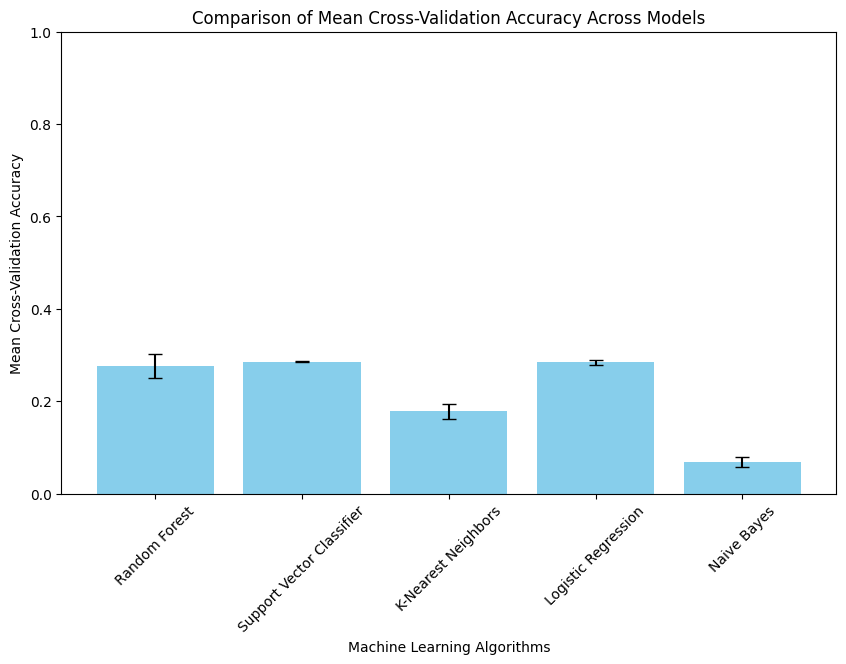

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

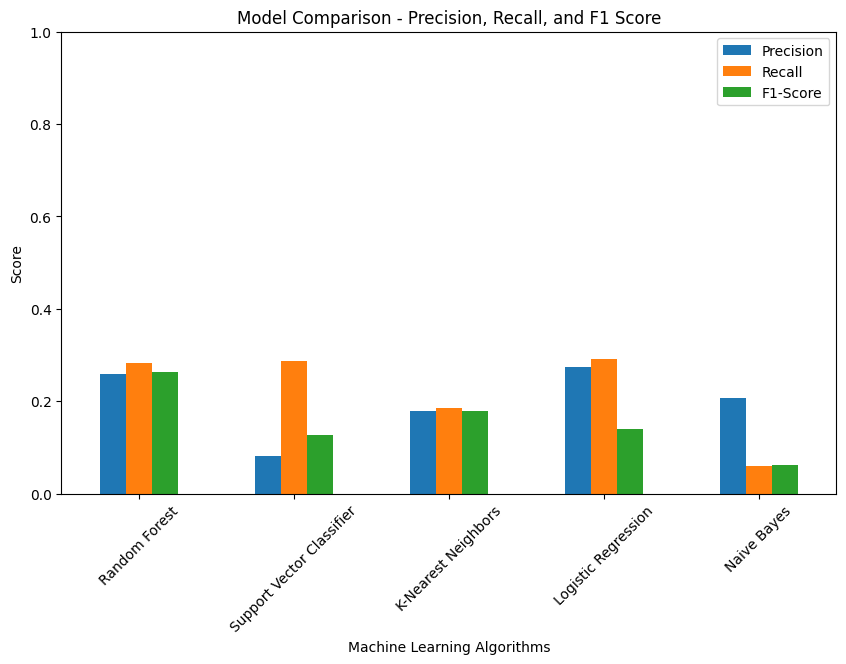

In [23]:
# Step 1: Import Libraries
# features_for_model AND labels
# use the

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Define the Models and Perform Stratified Cross-Validation
# Define the models
models = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB()
}

# Prepare cross-validation and store accuracies
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model_accuracies = {}

for name, model in models.items():
    # Perform cross-validation
    cv_accuracies = cross_val_score(model, features_for_model, labels, cv=kfold, scoring='accuracy')
    model_accuracies[name] = cv_accuracies  # Store accuracy for each fold

    # Print accuracy for each fold
    print(f"{name} - Cross-validation accuracies per fold: {cv_accuracies}")
    print(f"{name} - Mean cross-validation accuracy: {np.mean(cv_accuracies):.4f}\n")

    
# Calculate mean and standard deviation of cross-validation accuracies
mean_accuracies = {name: np.mean(acc) for name, acc in model_accuracies.items()}
std_accuracies = {name: np.std(acc) for name, acc in model_accuracies.items()}


# Step 3: Plot the Mean Cross-Validation Accuracies
# Plot the mean cross-validation accuracies with error bars for each model
plt.figure(figsize=(10, 6))
plt.bar(mean_accuracies.keys(), mean_accuracies.values(), yerr=std_accuracies.values(), capsize=5, color='skyblue')
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Comparison of Mean Cross-Validation Accuracy Across Models')
plt.ylim(0, 1)  # Set y-axis limit for better visibility
plt.xticks(rotation=45)
plt.show()

# Step 4: Additional Performance Metrics 

from sklearn.metrics import precision_score, recall_score, f1_score

# Train-test split for final evaluation
X_train, X_test, y_train, y_test = train_test_split(features_for_model, labels, test_size=0.2, stratify=labels, random_state=42)

# Initialize empty lists to store the metrics
precision_scores = []
recall_scores = []
f1_scores = []

for name, model in models.items():
    # Train and predict on the test split
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plot metrics for each model
metrics_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
}).set_index('Model')

metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison - Precision, Recall, and F1 Score')
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.show()


# Create a new set of labels by using existing labels into 3 labels into Low medium and high arousal based ON letter that follows after "A" in labels

# Used the new set of labels so that now there are 3 output classes and repeat steps below

In [21]:
import pandas as pd
combined_features_ppg_gsr = pd.read_csv('/kaggle/input/combined-ppg-gsr-features/combined_features_ppg_gsr.csv')
print(combined_features_ppg_gsr.columns)
# print(combined_features_ppg_gsr['subject_id'].head())
print(combined_features_ppg_gsr['arousal_valence_label'].head())
print(combined_features_ppg_gsr['arousal_valence_label'].iloc[0])

print(type(combined_features_ppg_gsr['arousal_valence_label'].iloc[0]))
first_label =combined_features_ppg_gsr['arousal_valence_label'].iloc[0]
letter = first_label[1]
print(letter)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       'vlf', 'lf', 'hf', 'tot_pow', 'lf_hf_ratio', 'peak_vlf', 'peak_lf',
       'peak_hf', 'lf_nu', 'hf_nu'],
      dtype='object', length=841)
0    AMVM
1    AMVL
2    AMVM
3    AMVM
4    AMVM
Name: arousal_valence_label, dtype: object
AMVM
<class 'str'>
M


In [22]:
# Function to categorize arousal based on the second letter of arousal_valence_label
def categorize_arousal_level(label):
    second_letter = label[1]
    if second_letter in ['L']:  # Adjust as needed for Low arousal
        return 'Low'
    elif second_letter in ['M']:  # Adjust as needed for Medium arousal
        return 'Medium'
    else:
        return 'High'  # Remaining letters for High arousal

# Apply the function to create the new labels
new_labels = combined_features_ppg_gsr['arousal_valence_label'].apply(categorize_arousal_level)

# Prepare the features and new labels for classification
features_for_model = combined_features_ppg_gsr.drop(columns=['subject_id', 'video_id', 'arousal_valence_label'])
# labels = new_labels_dataframe['arousal_level']


print(new_labels[:5])
print(new_labels[2334:])
print(new_labels.unique())


0    Medium
1    Medium
2    Medium
3    Medium
4    Medium
Name: arousal_valence_label, dtype: object
2334       Low
2335    Medium
Name: arousal_valence_label, dtype: object
['Medium' 'Low' 'High']


Random Forest - Cross-validation accuracies per fold: [47.43589744 51.28205128 44.87179487 47.86324786 49.14529915 46.58119658
 47.63948498 51.93133047 50.21459227 51.50214592]
Random Forest - Mean cross-validation accuracy: 48.85%

Support Vector Classifier - Cross-validation accuracies per fold: [50.         50.         50.         50.         50.         49.57264957
 49.78540773 49.78540773 49.78540773 49.78540773]
Support Vector Classifier - Mean cross-validation accuracy: 49.87%

K-Nearest Neighbors - Cross-validation accuracies per fold: [39.74358974 41.88034188 38.88888889 36.75213675 39.74358974 43.58974359
 39.05579399 39.48497854 42.06008584 41.20171674]
K-Nearest Neighbors - Mean cross-validation accuracy: 40.24%

Logistic Regression - Cross-validation accuracies per fold: [50.         50.         50.         50.         50.         49.57264957
 49.78540773 49.78540773 49.35622318 49.78540773]
Logistic Regression - Mean cross-validation accuracy: 49.83%

Naive Bayes - Cross-

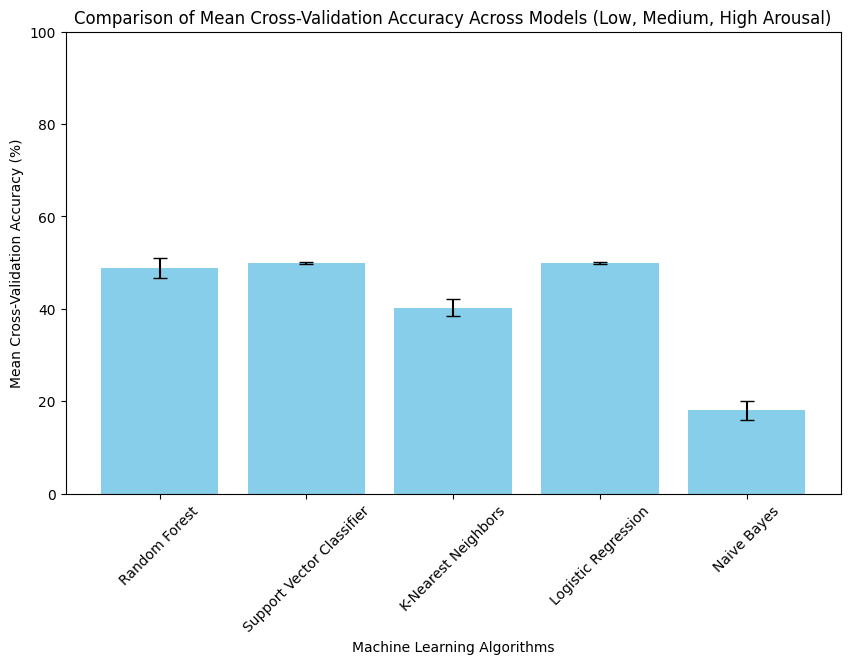

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


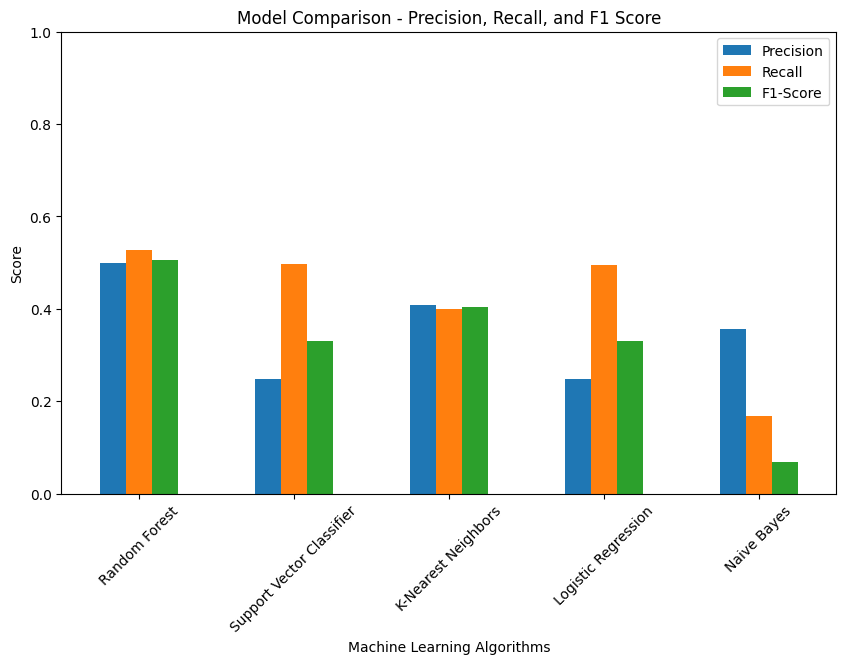

In [25]:
# use new_labels
# use features_for_model

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Define the models
models = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB()
}

# Prepare cross-validation and store accuracies
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model_accuracies = {}

for name, model in models.items():
    # Perform cross-validation
    cv_accuracies = cross_val_score(model, features_for_model, new_labels, cv=kfold, scoring='accuracy')
    model_accuracies[name] = cv_accuracies  # Store accuracy for each fold

    # Print accuracy for each fold
    print(f"{name} - Cross-validation accuracies per fold: {cv_accuracies * 100}")  # Convert to percentages
    print(f"{name} - Mean cross-validation accuracy: {np.mean(cv_accuracies) * 100:.2f}%\n")  # Convert to percentage

# Calculate mean and standard deviation of cross-validation accuracies
mean_accuracies = {name: np.mean(acc) * 100 for name, acc in model_accuracies.items()}  # Convert to percentages
std_accuracies = {name: np.std(acc) * 100 for name, acc in model_accuracies.items()}  # Convert to percentages

# Plot the mean cross-validation accuracies with error bars for each model
plt.figure(figsize=(10, 6))
plt.bar(mean_accuracies.keys(), mean_accuracies.values(), yerr=std_accuracies.values(), capsize=5, color='skyblue')
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Mean Cross-Validation Accuracy (%)')
plt.title('Comparison of Mean Cross-Validation Accuracy Across Models (Low, Medium, High Arousal)')
plt.ylim(0, 100)  # Set y-axis limit for percentages
plt.xticks(rotation=45)
plt.show()

# Train-test split for final evaluation
X_train, X_test, y_train, y_test = train_test_split(features_for_model, new_labels, test_size=0.2, stratify=new_labels, random_state=42)

# Initialize lists to store metrics
precision_scores = []
recall_scores = []
f1_scores = []

for name, model in models.items():
    # Train and predict on the test split
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred, average='weighted')  # Remain as fraction
    recall = recall_score(y_test, y_pred, average='weighted')  # Remain as fraction
    f1 = f1_score(y_test, y_pred, average='weighted')  # Remain as fraction
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Create a DataFrame for the metrics and plot
metrics_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
}).set_index('Model')

metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison - Precision, Recall, and F1 Score')
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Score')
plt.ylim(0, 1)  # Metrics remain in fraction (0 to 1)
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.show()


In [26]:
ppg_all_features = pd.read_csv("/kaggle/input/ppg-extracted-features/ppg_all_features.csv")

print(ppg_all_features.columns)

Index(['mean', 'var', 'median', 'max', 'min', 'range', 'rmssd', 'sdsd',
       'nni_50', 'pnni_50', 'nni_20', 'pnni_20', 'avg_hr', 'std_hr', 'min_hr',
       'max_hr', 'energy', 'abs_sum_diff', 'subject_id', 'video_id',
       'arousal_valence_label', 'vlf', 'lf', 'hf', 'tot_pow', 'lf_hf_ratio',
       'peak_vlf', 'peak_lf', 'peak_hf', 'lf_nu', 'hf_nu'],
      dtype='object')


# 3 categories with only PPG

Random Forest - Cross-validation accuracies per fold: [51.70940171 54.27350427 47.00854701 49.57264957 52.56410256 51.70940171
 53.64806867 51.93133047 53.64806867 53.21888412]
Random Forest - Mean cross-validation accuracy: 51.93%

Support Vector Classifier - Cross-validation accuracies per fold: [50.         50.         50.         50.         50.         49.57264957
 49.78540773 49.78540773 49.78540773 49.78540773]
Support Vector Classifier - Mean cross-validation accuracy: 49.87%

K-Nearest Neighbors - Cross-validation accuracies per fold: [37.60683761 41.02564103 38.03418803 33.33333333 36.32478632 40.17094017
 36.05150215 34.33476395 39.05579399 42.48927039]
K-Nearest Neighbors - Mean cross-validation accuracy: 37.84%

Logistic Regression - Cross-validation accuracies per fold: [50.         50.         50.         50.         50.         49.57264957
 49.78540773 49.78540773 49.78540773 49.78540773]
Logistic Regression - Mean cross-validation accuracy: 49.87%

Naive Bayes - Cross-

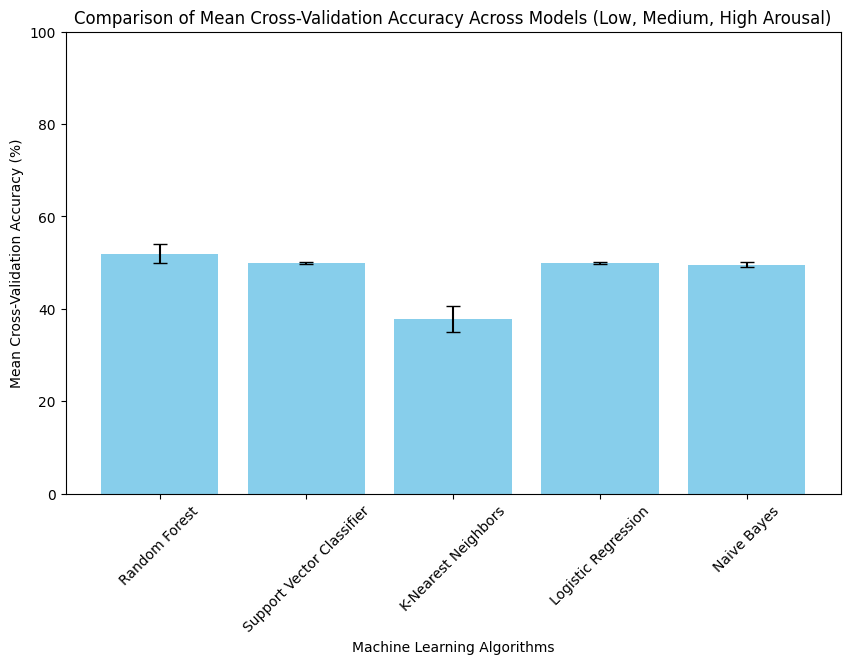

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


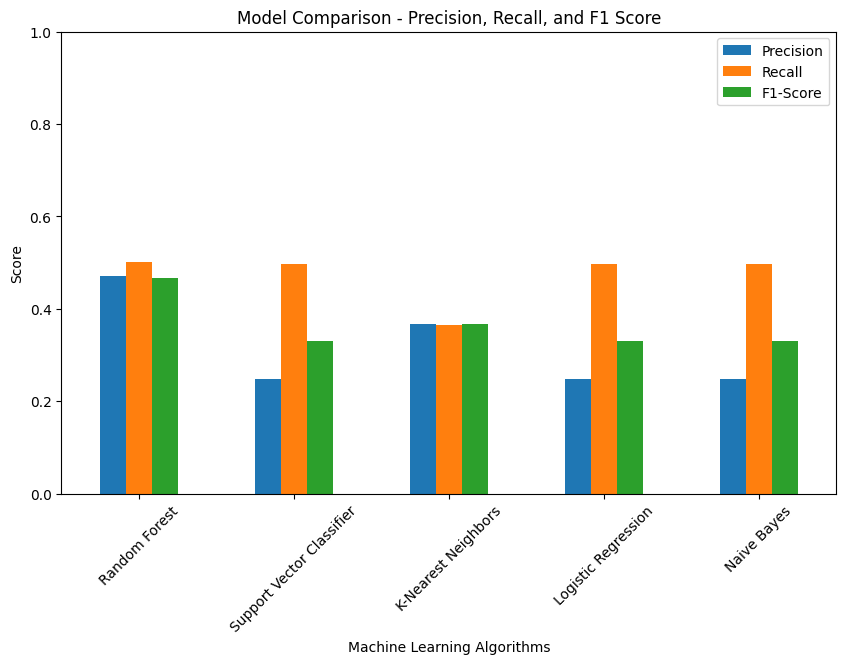

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Step 1: Define function to categorize arousal level
def categorize_arousal_level(label):
    second_letter = label[1]
    if second_letter == 'L':
        return 'Low'
    elif second_letter == 'M':
        return 'Medium'
    else:
        return 'High'

# Step 2: Apply categorization function to generate new labels
ppg_all_features['new_labels'] = ppg_all_features['arousal_valence_label'].apply(categorize_arousal_level)

# Step 3: Prepare features and labels
feature_columns = [
    'mean', 'var', 'median', 'max', 'min', 'range', 'rmssd', 'sdsd', 'nni_50', 
    'pnni_50', 'nni_20', 'pnni_20', 'avg_hr', 'std_hr', 'min_hr', 'max_hr', 
    'energy', 'abs_sum_diff', 'vlf', 'lf', 'hf', 'tot_pow', 'lf_hf_ratio', 
    'peak_vlf', 'peak_lf', 'peak_hf', 'lf_nu', 'hf_nu'
]
features = ppg_all_features[feature_columns]
labels = ppg_all_features['new_labels']

# Step 4: Define the models
models = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB()
}

# Step 5: Perform Stratified Cross-Validation and store accuracies
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model_accuracies = {}

for name, model in models.items():
    # Perform cross-validation
    cv_accuracies = cross_val_score(model, features, labels, cv=kfold, scoring='accuracy')
    model_accuracies[name] = cv_accuracies  # Store accuracy for each fold

    # Print accuracy for each fold
    print(f"{name} - Cross-validation accuracies per fold: {cv_accuracies * 100}")  # Convert to percentages
    print(f"{name} - Mean cross-validation accuracy: {np.mean(cv_accuracies) * 100:.2f}%\n")  # Convert to percentage

# Calculate mean and standard deviation of cross-validation accuracies
mean_accuracies = {name: np.mean(acc) * 100 for name, acc in model_accuracies.items()}  # Convert to percentages
std_accuracies = {name: np.std(acc) * 100 for name, acc in model_accuracies.items()}  # Convert to percentages

# Step 6: Plot the mean cross-validation accuracies with error bars
plt.figure(figsize=(10, 6))
plt.bar(mean_accuracies.keys(), mean_accuracies.values(), yerr=std_accuracies.values(), capsize=5, color='skyblue')
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Mean Cross-Validation Accuracy (%)')
plt.title('Comparison of Mean Cross-Validation Accuracy Across Models (Low, Medium, High Arousal)')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()

# Step 7: Train-test split for final evaluation and compute metrics
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=42)

# Initialize lists to store metrics
precision_scores = []
recall_scores = []
f1_scores = []

for name, model in models.items():
    # Train and predict on the test split
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics (precision, recall, F1 score remain in 0-1 range)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Step 8: Create a DataFrame for the metrics and plot
metrics_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
}).set_index('Model')

metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison - Precision, Recall, and F1 Score')
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.show()


In [3]:
import pandas as pd
gsr_features = pd.read_csv('/kaggle/input/gsr-cwt-features-extracted/gsr_cwt_features.csv'
)
print(gsr_features.columns)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '801', '802', '803', '804', '805', '806', '807', '808', '809', 'label'],
      dtype='object', length=811)


# RESOLVE ERROR FOR GETTING FEATURE COLUMNS

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Step 1: Define function to categorize arousal level
def categorize_arousal_level(label):
    second_letter = label[1]
    if second_letter == 'L':
        return 'Low'
    elif second_letter == 'M':
        return 'Medium'
    else:
        return 'High'

# Step 2: Apply categorization function to generate new labels
gsr_features['new_labels'] = gsr_features['label'].apply(categorize_arousal_level)

# Step 3: Prepare features and labels
feature_columns_df = gsr_features.drop(columns=['label'])
print(type(feature_columns_df))
print(feature_columns_df.columns)
print(feature_columns_df.head())

<class 'pandas.core.frame.DataFrame'>
Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '801', '802', '803', '804', '805', '806', '807', '808', '809',
       'new_labels'],
      dtype='object', length=811)
            0           1           2            3            4            5  \
0 -489.900064  249.957626  695.798650  1269.989317  1932.865525  2512.369072   
1 -371.298968  188.241130  525.770448   962.464232  1467.857592  1908.403496   
2 -332.607841  169.239480  471.893956   864.626077  1319.076539  1715.661136   
3 -372.088379  189.657275  527.273115   971.353328  1484.931226  1910.980927   
4 -382.798504  194.297101  541.833674   994.344921  1519.422305  1980.394334   

             6            7            8            9  ...           801  \
0  3035.143103  3931.854024  4497.474746  5534.682888  ...  9.222004e+05   
1  2307.558460  2997.022780  3450.632849  4261.863915  ...  1.145031e+06   
2  2070.769858  2677.494942  3060.500768  3755.133436  ... 

In [5]:
print(feature_columns_df.shape)

(2336, 811)


In [7]:

# features = feature_columns_df

# Step 3: Prepare features and labels by dropping the label column
feature_columns_df = gsr_features.drop(columns=['new_labels'])
features = feature_columns_df
labels = gsr_features['new_labels']

# Step 4: Define the models
models = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB()
}

# Step 5: Perform Stratified Cross-Validation and store accuracies
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model_accuracies = {}

for name, model in models.items():
    # Perform cross-validation
    cv_accuracies = cross_val_score(model, features, labels, cv=kfold, scoring='accuracy')
    model_accuracies[name] = cv_accuracies  # Store accuracy for each fold

    # Print accuracy for each fold
    print(f"{name} - Cross-validation accuracies per fold: {cv_accuracies * 100}")  # Convert to percentages
    print(f"{name} - Mean cross-validation accuracy: {np.mean(cv_accuracies) * 100:.2f}%\n")  # Convert to percentage

# Calculate mean and standard deviation of cross-validation accuracies
mean_accuracies = {name: np.mean(acc) * 100 for name, acc in model_accuracies.items()}  # Convert to percentages
std_accuracies = {name: np.std(acc) * 100 for name, acc in model_accuracies.items()}  # Convert to percentages

# Step 6: Plot the mean cross-validation accuracies with error bars
plt.figure(figsize=(10, 6))
plt.bar(mean_accuracies.keys(), mean_accuracies.values(), yerr=std_accuracies.values(), capsize=5, color='skyblue')
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Mean Cross-Validation Accuracy (%)')
plt.title('Comparison of Mean Cross-Validation Accuracy Across Models (Low, Medium, High Arousal)')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()

# Step 7: Train-test split for final evaluation and compute metrics
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=0.2, stratify=labels, random_state=42)

# Initialize lists to store metrics
precision_scores = []
recall_scores = []
f1_scores = []

for name, model in models.items():
    # Train and predict on the test split
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics (precision, recall, F1 score remain in 0-1 range)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Step 8: Create a DataFrame for the metrics and plot
metrics_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
}).set_index('Model')

metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison - Precision, Recall, and F1 Score')
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.show()


ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 345, in fit
    X, y = self._validate_data(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'AMVM'

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 345, in fit
    X, y = self._validate_data(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'AMVL'


# 3 Categories with only level 5 arousal as medium 

# 1-4 as low arousal

# 6-9 as high arousal

In [6]:
import pandas as pd

# Specify the path to the CSV file
file_path = '/kaggle/input/data-intervals-not-normalized-with-labels/data_intervals_not_normalized1.csv'

# Read the CSV file into a DataFrame
data_intervals_dataframe = pd.read_csv(file_path)

# Display the first few rows to verify
print(data_intervals_dataframe.head())


   subject_id  video_id                                           gsr_data  \
0           7         0  179125.171875,178570.375,179391.03125,181556.2...   
1           7         1  182172.671875,182666.59375,183080.09375,184354...   
2           7         2  168857.21875,168781.234375,169132.53125,169823...   
3           7         3  178895.96875,178088.4375,177970.546875,177919....   
4           7         4  195028.421875,195278.421875,195498.46875,19572...   

                                            ppg_data  valence  arousal  \
0  612293.0,611442.0,610770.0,610083.0,609360.0,6...        4        5   
1  551232.0,551091.0,550905.0,550746.0,550549.0,5...        3        5   
2  605678.0,605853.0,606119.0,606351.0,606579.0,6...        4        5   
3  565274.0,565598.0,566007.0,566224.0,566272.0,5...        5        6   
4  549417.0,549378.0,549404.0,549342.0,549404.0,5...        6        6   

  arousal_level valence_level arousal_valence_label  
0             M             M   

In [9]:
data_intervals_dataframe_updated = data_intervals_dataframe.drop(columns=['arousal_level' ,'valence_level','arousal_valence_label'])

print(data_intervals_dataframe_updated.head())

print(data_intervals_dataframe_updated.columns)

   subject_id  video_id                                           gsr_data  \
0           7         0  179125.171875,178570.375,179391.03125,181556.2...   
1           7         1  182172.671875,182666.59375,183080.09375,184354...   
2           7         2  168857.21875,168781.234375,169132.53125,169823...   
3           7         3  178895.96875,178088.4375,177970.546875,177919....   
4           7         4  195028.421875,195278.421875,195498.46875,19572...   

                                            ppg_data  valence  arousal  
0  612293.0,611442.0,610770.0,610083.0,609360.0,6...        4        5  
1  551232.0,551091.0,550905.0,550746.0,550549.0,5...        3        5  
2  605678.0,605853.0,606119.0,606351.0,606579.0,6...        4        5  
3  565274.0,565598.0,566007.0,566224.0,566272.0,5...        5        6  
4  549417.0,549378.0,549404.0,549342.0,549404.0,5...        6        6  
Index(['subject_id', 'video_id', 'gsr_data', 'ppg_data', 'valence', 'arousal'], dtype='object

In [10]:
import pandas as pd

# Assuming your dataframe is 'data_intervals_dataframe_updated'
# Create the arousal_category column
data_intervals_dataframe_updated['arousal_category'] = data_intervals_dataframe_updated['arousal'].apply(
    lambda x: 'L' if x < 5 else ('M' if x == 5 else 'H')
)

# Check the updated dataframe
print(data_intervals_dataframe_updated.head())


   subject_id  video_id                                           gsr_data  \
0           7         0  179125.171875,178570.375,179391.03125,181556.2...   
1           7         1  182172.671875,182666.59375,183080.09375,184354...   
2           7         2  168857.21875,168781.234375,169132.53125,169823...   
3           7         3  178895.96875,178088.4375,177970.546875,177919....   
4           7         4  195028.421875,195278.421875,195498.46875,19572...   

                                            ppg_data  valence  arousal  \
0  612293.0,611442.0,610770.0,610083.0,609360.0,6...        4        5   
1  551232.0,551091.0,550905.0,550746.0,550549.0,5...        3        5   
2  605678.0,605853.0,606119.0,606351.0,606579.0,6...        4        5   
3  565274.0,565598.0,566007.0,566224.0,566272.0,5...        5        6   
4  549417.0,549378.0,549404.0,549342.0,549404.0,5...        6        6   

  arousal_category  
0                M  
1                M  
2                M  
3 

In [13]:
print(data_intervals_dataframe_updated['arousal_category'].unique())

# Get the value counts of each unique value in the 'arousal_category' column
value_counts = data_intervals_dataframe_updated['arousal_category'].value_counts()

# Print the value counts
print(value_counts)

['M' 'H' 'L']
arousal_category
L    1167
H     654
M     515
Name: count, dtype: int64


# PPG FREQUENCY AND TIME FEATURES

In [16]:
# Apply the functions to 'ppg_filtered_data' in preprocessed_dataframe
time_features = data_intervals_dataframe_updated['ppg_data'].apply(
    lambda x: pd.Series({
        'mean': np.mean(x),
        'var': np.var(x),
        'median': np.median(x),
        'max': np.max(x),
        'min': np.min(x),
        'range': ranges(x),
        'rmssd': rmssd(x),
        'sdsd': sdsd(x),
        'nni_50': nni_50(x),
        'pnni_50': pnni_50(x),
        'nni_20': nni_20(x),
        'pnni_20': pnni_20(x),
        'avg_hr': avg_hr(x),
        'std_hr': std_hr(x),
        'min_hr': min_hr(x),
        'max_hr': max_hr(x),
        'energy': energy(x),
        'abs_sum_diff': abs_sum_diff(x)
    })
)

# Reset the index to align with the preprocessed_dataframe
time_features = time_features.reset_index(drop=True)

# Add the 'subject_id', 'video_id', and 'arousal_valence_label' to the time_features dataframe
time_features['subject_id'] = data_intervals_dataframe_updated['subject_id']
time_features['video_id'] = data_intervals_dataframe_updated['video_id']
time_features['arousal_valence_label'] = data_intervals_dataframe_updated['arousal_valence_label']

# Optionally, check the result
print(time_features.head())


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U19808'), dtype('<U19808')) -> None

# IGNORE FROM HERE

# Multi input LSTM with separate layer for PPG & GSR

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, random_split, TensorDataset
# import matplotlib.pyplot as plt

# # Check if GPU is available
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(f"Using device: {device}")

# # Assume data_intervals is already populated from previous steps

# # Split data into train and test sets (80% train, 20% test)
# train_size = int(0.8 * len(data_intervals))
# test_size = len(data_intervals) - train_size
# train_data, test_data = random_split(data_intervals, [train_size, test_size])

# # Convert data_intervals entries into tensors for PyTorch
# def prepare_data(data):
#     ppg_sequences = []
#     gsr_sequences = []
#     labels = []

#     for item in data:
#         ppg_sequences.append(torch.tensor(item['ppg_data'], dtype=torch.float32))
#         gsr_sequences.append(torch.tensor(item['gsr_data'], dtype=torch.float32))
#         labels.append(torch.tensor([item['arousal'], item['valence']], dtype=torch.float32))

#     # Stack sequences and labels to create tensor batches
#     ppg_sequences = nn.utils.rnn.pad_sequence(ppg_sequences, batch_first=True)
#     gsr_sequences = nn.utils.rnn.pad_sequence(gsr_sequences, batch_first=True)
#     labels = torch.stack(labels)

#     return TensorDataset(ppg_sequences, gsr_sequences, labels)

# train_dataset = prepare_data(train_data)
# test_dataset = prepare_data(test_data)

# # Load data into DataLoaders
# batch_size = 32
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=batch_size)

# # Define the LSTM model with separate layers for PPG and GSR data
# class MultiInputLSTM(nn.Module):
#     def __init__(self, input_size_ppg, input_size_gsr, hidden_size, output_size, num_layers=1, dropout=0.3):
#         super(MultiInputLSTM, self).__init__()
#         # LSTM for PPG data
#         self.lstm_ppg = nn.LSTM(input_size_ppg, hidden_size, num_layers, batch_first=True, dropout=dropout)
        
#         # LSTM for GSR data
#         self.lstm_gsr = nn.LSTM(input_size_gsr, hidden_size, num_layers, batch_first=True, dropout=dropout)
        
#         # Fully connected layer to combine the outputs and predict arousal and valence
#         self.fc = nn.Linear(hidden_size * 2, output_size)
#         self.fc_dropout = nn.Dropout(dropout)  # Dropout after fully connected layer

#     def forward(self, ppg_data, gsr_data):
#         # PPG LSTM forward
#         _, (h_ppg, _) = self.lstm_ppg(ppg_data)
#         h_ppg = h_ppg[-1]  # Take the final hidden state

#         # GSR LSTM forward
#         _, (h_gsr, _) = self.lstm_gsr(gsr_data)
#         h_gsr = h_gsr[-1]  # Take the final hidden state

#         # Concatenate the hidden states from both LSTMs
#         combined = torch.cat((h_ppg, h_gsr), dim=1)
        
#         # Apply dropout after fully connected layer
#         output = self.fc(combined)
#         output = self.fc_dropout(output)
#         return output

# # Model parameters
# input_size_ppg = 1  # Assuming PPG data is a single feature per timestep
# input_size_gsr = 1  # Assuming GSR data is a single feature per timestep
# hidden_size = 128   # Changed hidden size
# output_size = 2  # Arousal and Valence
# num_layers = 2    # Changed number of layers
# dropout = 0.3     # Dropout rate

# # Instantiate the model, loss function, and optimizer with weight decay (L2 regularization)
# model = MultiInputLSTM(input_size_ppg, input_size_gsr, hidden_size, output_size, num_layers, dropout)
# model.to(device)  # Move model to GPU if available
# criterion = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)  # Added weight decay

# # Training function with validation evaluation
# def train(model, train_loader, test_loader, criterion, optimizer, epochs=500):
#     train_losses = []
#     val_losses = []
#     train_accuracies = []
#     val_accuracies = []

#     for epoch in range(epochs):
#         model.train()
#         total_train_loss = 0
#         correct_train_predictions = 0
#         total_train_predictions = 0

#         for ppg_data, gsr_data, labels in train_loader:
#             ppg_data = ppg_data.unsqueeze(-1).to(device)  # Move data to GPU
#             gsr_data = gsr_data.unsqueeze(-1).to(device)  # Move data to GPU
#             labels = labels.to(device)  # Move labels to GPU
            
#             # Zero the gradients
#             optimizer.zero_grad()
            
#             # Forward pass
#             outputs = model(ppg_data, gsr_data)
#             loss = criterion(outputs, labels)
#             total_train_loss += loss.item()
            
#             # Backward and optimize
#             loss.backward()
#             optimizer.step()
            
#             # Calculate training accuracy
#             predictions = outputs.round()  # Rounding predictions to nearest integer
#             correct_train_predictions += (predictions == labels).sum().item()
#             total_train_predictions += labels.numel()

#         # Calculate average training loss and accuracy
#         avg_train_loss = total_train_loss / len(train_loader)
#         train_losses.append(avg_train_loss)
#         train_accuracy = (correct_train_predictions / total_train_predictions) * 100
#         train_accuracies.append(train_accuracy)
        
#         # Evaluate on validation set
#         val_loss, val_accuracy = evaluate(model, test_loader, criterion)
#         val_losses.append(val_loss)
#         val_accuracies.append(val_accuracy)

#         print(f"Epoch [{epoch+1}/{epochs}], "
#               f"Train Loss: {avg_train_loss:.4f}, "
#               f"Train Accuracy: {train_accuracy:.2f}%, "
#               f"Validation Loss: {val_loss:.4f}, "
#               f"Validation Accuracy: {val_accuracy:.2f}%")

#     return train_losses, val_losses, train_accuracies, val_accuracies

# # Evaluation function
# def evaluate(model, data_loader, criterion):
#     model.eval()
#     total_loss = 0
#     correct_predictions = 0
#     total_predictions = 0

#     with torch.no_grad():
#         for ppg_data, gsr_data, labels in data_loader:
#             ppg_data = ppg_data.unsqueeze(-1).to(device)  # Move data to GPU
#             gsr_data = gsr_data.unsqueeze(-1).to(device)  # Move data to GPU
#             labels = labels.to(device)  # Move labels to GPU
#             outputs = model(ppg_data, gsr_data)
#             loss = criterion(outputs, labels)
#             total_loss += loss.item()

#             # Calculate accuracy based on mean absolute error tolerance
#             predictions = outputs.round()  # Rounding predictions to nearest integer
#             correct_predictions += (predictions == labels).sum().item()
#             total_predictions += labels.numel()

#     avg_loss = total_loss / len(data_loader)
#     accuracy = (correct_predictions / total_predictions) * 100
#     return avg_loss, accuracy

# # Train the model and retrieve metrics
# epochs = 500  # Changed epochs to 500
# train_losses, val_losses, train_accuracies, val_accuracies = train(model, train_loader, test_loader, criterion, optimizer, epochs=epochs)

# # Plotting training and validation loss
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
# plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.title('Training and Validation Loss')

# # Plotting training and validation accuracy
# plt.subplot(1, 2, 2)
# plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
# plt.plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy (%)')
# plt.legend()
# plt.title('Training and Validation Accuracy')

# plt.show()


# Categorical Ouptuts without label encoding

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, random_split, TensorDataset
# import matplotlib.pyplot as plt

# # Assume data_intervals is already populated from previous steps

# # Split data into train and test sets (80% train, 20% test)
# train_size = int(0.8 * len(data_intervals))
# test_size = len(data_intervals) - train_size
# train_data, test_data = random_split(data_intervals, [train_size, test_size])

# # Convert data_intervals entries into tensors for PyTorch
# def prepare_data(data):
#     ppg_sequences = []
#     gsr_sequences = []
#     labels = []

#     for item in data:
#         ppg_sequences.append(torch.tensor(item['ppg_data'], dtype=torch.float32))
#         gsr_sequences.append(torch.tensor(item['gsr_data'], dtype=torch.float32))
#         # Convert arousal and valence to integer class indices (1-9 for both, adjusting to 0-8)
#         arousal_class = int(item['arousal']) - 1  # Adjusting arousal to range 0-8
#         valence_class = int(item['valence']) - 1  # Adjusting valence to range 0-8
#         # Combine the classes into a single value (arousal class * 9 + valence class)
#         combined_class = arousal_class * 9 + valence_class
#         labels.append(torch.tensor(combined_class, dtype=torch.long))  # Long tensor for classification

#     # Stack sequences and labels to create tensor batches
#     ppg_sequences = nn.utils.rnn.pad_sequence(ppg_sequences, batch_first=True)
#     gsr_sequences = nn.utils.rnn.pad_sequence(gsr_sequences, batch_first=True)
#     labels = torch.stack(labels)

#     return TensorDataset(ppg_sequences, gsr_sequences, labels)

# train_dataset = prepare_data(train_data)
# test_dataset = prepare_data(test_data)

# # Load data into DataLoaders
# batch_size = 32
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=batch_size)

# # Define the LSTM model with separate layers for PPG and GSR data
# class MultiInputLSTM(nn.Module):
#     def __init__(self, input_size_ppg, input_size_gsr, hidden_size, output_size, num_layers=1):
#         super(MultiInputLSTM, self).__init__()
#         # LSTM for PPG data
#         self.lstm_ppg = nn.LSTM(input_size_ppg, hidden_size, num_layers, batch_first=True)
        
#         # LSTM for GSR data
#         self.lstm_gsr = nn.LSTM(input_size_gsr, hidden_size, num_layers, batch_first=True)
        
#         # Fully connected layer to combine the outputs and predict arousal and valence
#         self.fc = nn.Linear(hidden_size * 2, output_size)

#     def forward(self, ppg_data, gsr_data):
#         # PPG LSTM forward
#         _, (h_ppg, _) = self.lstm_ppg(ppg_data)
#         h_ppg = h_ppg[-1]  # Take the final hidden state

#         # GSR LSTM forward
#         _, (h_gsr, _) = self.lstm_gsr(gsr_data)
#         h_gsr = h_gsr[-1]  # Take the final hidden state

#         # Concatenate the hidden states from both LSTMs
#         combined = torch.cat((h_ppg, h_gsr), dim=1)
        
#         # Fully connected output layer with softmax for categorical prediction
#         output = self.fc(combined)
#         return output

# # Model parameters
# input_size_ppg = 1  # Assuming PPG data is a single feature per timestep
# input_size_gsr = 1  # Assuming GSR data is a single feature per timestep
# hidden_size = 128   # Updated hidden size
# output_size = 81    # 81 classes for combined arousal (0-8) and valence (0-8)
# num_layers = 1

# # Instantiate the model, loss function, and optimizer
# model = MultiInputLSTM(input_size_ppg, input_size_gsr, hidden_size, output_size, num_layers)
# criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss for classification
# optimizer = optim.Adam(model.parameters(), lr=0.0001)

# # Training function with validation evaluation
# def train(model, train_loader, test_loader, criterion, optimizer, epochs=500):
#     train_losses = []
#     val_losses = []
#     train_accuracies = []
#     val_accuracies = []

#     for epoch in range(epochs):
#         model.train()
#         total_train_loss = 0
#         correct_train_predictions = 0
#         total_train_predictions = 0

#         for ppg_data, gsr_data, labels in train_loader:
#             ppg_data = ppg_data.unsqueeze(-1)
#             gsr_data = gsr_data.unsqueeze(-1)
            
#             # Zero the gradients
#             optimizer.zero_grad()
            
#             # Forward pass
#             outputs = model(ppg_data, gsr_data)
#             loss = criterion(outputs, labels)  # Directly use labels without reshaping
#             total_train_loss += loss.item()
            
#             # Backward and optimize
#             loss.backward()
#             optimizer.step()
            
#             # Calculate training accuracy
#             _, predicted = torch.max(outputs, 1)  # Get the predicted class index
#             correct_train_predictions += (predicted == labels).sum().item()
#             total_train_predictions += labels.numel()
        
#         # Calculate average training loss and accuracy
#         avg_train_loss = total_train_loss / len(train_loader)
#         train_losses.append(avg_train_loss)
#         train_accuracy = (correct_train_predictions / total_train_predictions) * 100
#         train_accuracies.append(train_accuracy)
        
#         # Evaluate on validation set
#         val_loss, val_accuracy = evaluate(model, test_loader, criterion)
#         val_losses.append(val_loss)
#         val_accuracies.append(val_accuracy)

#         print(f"Epoch [{epoch+1}/{epochs}], "
#               f"Train Loss: {avg_train_loss:.4f}, "
#               f"Train Accuracy: {train_accuracy:.2f}%, "
#               f"Validation Loss: {val_loss:.4f}, "
#               f"Validation Accuracy: {val_accuracy:.2f}%")

#     return train_losses, val_losses, train_accuracies, val_accuracies

# # Evaluation function
# def evaluate(model, data_loader, criterion):
#     model.eval()
#     total_loss = 0
#     correct_predictions = 0
#     total_predictions = 0

#     with torch.no_grad():
#         for ppg_data, gsr_data, labels in data_loader:
#             ppg_data = ppg_data.unsqueeze(-1)
#             gsr_data = gsr_data.unsqueeze(-1)
#             outputs = model(ppg_data, gsr_data)
#             loss = criterion(outputs, labels)
#             total_loss += loss.item()

#             # Calculate accuracy
#             _, predicted = torch.max(outputs, 1)
#             correct_predictions += (predicted == labels).sum().item()
#             total_predictions += labels.numel()

#     avg_loss = total_loss / len(data_loader)
#     accuracy = (correct_predictions / total_predictions) * 100
#     return avg_loss, accuracy

# # Train the model and retrieve metrics
# epochs = 500  # Updated epochs to 500
# train_losses, val_losses, train_accuracies, val_accuracies = train(model, train_loader, test_loader, criterion, optimizer, epochs=epochs)

# # Plotting training and validation loss
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
# plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.title('Training and Validation Loss')

# # Plotting training and validation accuracy
# plt.subplot(1, 2, 2)
# plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
# plt.plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy (%)')
# plt.legend()
# plt.title('Training and Validation Accuracy')

# plt.show()


# Categorical Outputs with label encoding low medium high A & V

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, TensorDataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import random
import numpy as np

# Set seed for reproducibility
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

# Check if GPU is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Assume data_intervals is already populated from previous steps

# Initialize the LabelEncoder for 9 unique arousal-valence combinations
label_encoder = LabelEncoder()
arousal_valence_labels = [item['arousal_valence_label'] for item in data_intervals]
label_encoder.fit(arousal_valence_labels)

# Split data into train and test sets (80% train, 20% test)
train_size = int(0.8 * len(data_intervals))
test_size = len(data_intervals) - train_size
train_data, test_data = random_split(data_intervals, [train_size, test_size])

def prepare_data(data):
    ppg_sequences = []
    gsr_sequences = []
    labels = []

    for item in data:
        ppg_sequences.append(torch.tensor(item['ppg_data'], dtype=torch.float32))
        gsr_sequences.append(torch.tensor(item['gsr_data'], dtype=torch.float32))
        combined_class = label_encoder.transform([item['arousal_valence_label']])[0]
        labels.append(torch.tensor(combined_class, dtype=torch.long))

    ppg_sequences = nn.utils.rnn.pad_sequence(ppg_sequences, batch_first=True)
    gsr_sequences = nn.utils.rnn.pad_sequence(gsr_sequences, batch_first=True)
    labels = torch.stack(labels)

    return TensorDataset(ppg_sequences, gsr_sequences, labels)

train_dataset = prepare_data(train_data)
test_dataset = prepare_data(test_data)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

class MultiInputLSTM(nn.Module):
    def __init__(self, input_size_ppg, input_size_gsr, hidden_size, output_size, num_layers=1):
        super(MultiInputLSTM, self).__init__()
        self.lstm_ppg = nn.LSTM(input_size_ppg, hidden_size, num_layers, batch_first=True)
        self.lstm_gsr = nn.LSTM(input_size_gsr, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)

    def forward(self, ppg_data, gsr_data):
        _, (h_ppg, _) = self.lstm_ppg(ppg_data)
        h_ppg = h_ppg[-1]
        _, (h_gsr, _) = self.lstm_gsr(gsr_data)
        h_gsr = h_gsr[-1]
        combined = torch.cat((h_ppg, h_gsr), dim=1)
        output = self.fc(combined)
        return output

input_size_ppg = 1
input_size_gsr = 1
hidden_size = 128
output_size = 9
num_layers = 1

# Instantiate the model, loss function, and optimizer
model = MultiInputLSTM(input_size_ppg, input_size_gsr, hidden_size, output_size, num_layers).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Function to train the model with saving best model state
def train(model, train_loader, test_loader, criterion, optimizer, epochs=500):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    best_val_accuracy = 0.0  # Track the best validation accuracy
    best_model_state = None  # To store the best model state

    for epoch in range(epochs):
        model.train()
        total_train_loss = 0
        correct_train_predictions = 0
        total_train_predictions = 0

        for ppg_data, gsr_data, labels in train_loader:
            ppg_data = ppg_data.unsqueeze(-1).to(device)
            gsr_data = gsr_data.unsqueeze(-1).to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(ppg_data, gsr_data)
            loss = criterion(outputs, labels)
            total_train_loss += loss.item()

            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs, 1)
            correct_train_predictions += (predicted == labels).sum().item()
            total_train_predictions += labels.numel()

        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        train_accuracy = (correct_train_predictions / total_train_predictions) * 100
        train_accuracies.append(train_accuracy)

        val_loss, val_accuracy = evaluate(model, test_loader, criterion)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        # Check if current model is the best, and save if it is
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_model_state = model.state_dict()  # Save the model state

        print(f"Epoch [{epoch+1}/{epochs}], "
              f"Train Loss: {avg_train_loss:.4f}, "
              f"Train Accuracy: {train_accuracy:.2f}%, "
              f"Validation Loss: {val_loss:.4f}, "
              f"Validation Accuracy: {val_accuracy:.2f}%")

    # Save the best model state to a file
    torch.save(best_model_state, "best_model.pth")
    print(f"Best model saved with validation accuracy: {best_val_accuracy:.2f}%")

    return train_losses, val_losses, train_accuracies, val_accuracies

def evaluate(model, data_loader, criterion):
    model.eval()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for ppg_data, gsr_data, labels in data_loader:
            ppg_data = ppg_data.unsqueeze(-1).to(device)
            gsr_data = gsr_data.unsqueeze(-1).to(device)
            labels = labels.to(device)

            outputs = model(ppg_data, gsr_data)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.numel()

    avg_loss = total_loss / len(data_loader)
    accuracy = (correct_predictions / total_predictions) * 100
    return avg_loss, accuracy

epochs = 500
train_losses, val_losses, train_accuracies, val_accuracies = train(model, train_loader, test_loader, criterion, optimizer, epochs=epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()


# Regression values as outputs

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, random_split, TensorDataset
# import matplotlib.pyplot as plt

# # Assume data_intervals is already populated from previous steps

# # Check if GPU is available and use it
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Split data into train and test sets (80% train, 20% test)
# train_size = int(0.8 * len(data_intervals))
# test_size = len(data_intervals) - train_size
# train_data, test_data = random_split(data_intervals, [train_size, test_size])

# # Convert data_intervals entries into tensors for PyTorch
# def prepare_data(data):
#     ppg_sequences = []
#     gsr_sequences = []
#     labels = []

#     for item in data:
#         ppg_sequences.append(torch.tensor(item['ppg_data'], dtype=torch.float32))
#         gsr_sequences.append(torch.tensor(item['gsr_data'], dtype=torch.float32))
#         labels.append(torch.tensor([item['arousal'], item['valence']], dtype=torch.float32))

#     # Stack sequences and labels to create tensor batches
#     ppg_sequences = nn.utils.rnn.pad_sequence(ppg_sequences, batch_first=True)
#     gsr_sequences = nn.utils.rnn.pad_sequence(gsr_sequences, batch_first=True)
#     labels = torch.stack(labels)

#     return TensorDataset(ppg_sequences, gsr_sequences, labels)

# train_dataset = prepare_data(train_data)
# test_dataset = prepare_data(test_data)

# # Load data into DataLoaders
# batch_size = 32
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=batch_size)

# # Define the LSTM model with separate layers for PPG and GSR data
# class MultiInputLSTM(nn.Module):
#     def __init__(self, input_size_ppg, input_size_gsr, hidden_size, output_size, num_layers=1):
#         super(MultiInputLSTM, self).__init__()
#         # LSTM for PPG data
#         self.lstm_ppg = nn.LSTM(input_size_ppg, hidden_size, num_layers, batch_first=True)
        
#         # LSTM for GSR data
#         self.lstm_gsr = nn.LSTM(input_size_gsr, hidden_size, num_layers, batch_first=True)
        
#         # Fully connected layer to combine the outputs and predict arousal and valence
#         self.fc = nn.Linear(hidden_size * 2, output_size)

#     def forward(self, ppg_data, gsr_data):
#         # PPG LSTM forward
#         _, (h_ppg, _) = self.lstm_ppg(ppg_data)
#         h_ppg = h_ppg[-1]  # Take the final hidden state

#         # GSR LSTM forward
#         _, (h_gsr, _) = self.lstm_gsr(gsr_data)
#         h_gsr = h_gsr[-1]  # Take the final hidden state

#         # Concatenate the hidden states from both LSTMs
#         combined = torch.cat((h_ppg, h_gsr), dim=1)
        
#         # Fully connected output layer
#         output = self.fc(combined)
#         return output

# # Model parameters
# input_size_ppg = 1  # Assuming PPG data is a single feature per timestep
# input_size_gsr = 1  # Assuming GSR data is a single feature per timestep
# hidden_size = 128   # Updated hidden size
# output_size = 2     # Arousal and Valence
# num_layers = 1

# # Instantiate the model, loss function, and optimizer
# model = MultiInputLSTM(input_size_ppg, input_size_gsr, hidden_size, output_size, num_layers)
# model = model.to(device)  # Move model to GPU if available
# criterion = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.0001)

# # Training function with validation evaluation
# def train(model, train_loader, test_loader, criterion, optimizer, epochs=500):
#     train_losses = []
#     val_losses = []
#     train_accuracies = []
#     val_accuracies = []

#     for epoch in range(epochs):
#         model.train()
#         total_train_loss = 0
#         correct_train_predictions = 0
#         total_train_predictions = 0

#         for ppg_data, gsr_data, labels in train_loader:
#             ppg_data = ppg_data.unsqueeze(-1).to(device)  # Move data to GPU
#             gsr_data = gsr_data.unsqueeze(-1).to(device)  # Move data to GPU
#             labels = labels.to(device)  # Move labels to GPU
            
#             # Zero the gradients
#             optimizer.zero_grad()
            
#             # Forward pass
#             outputs = model(ppg_data, gsr_data)
#             loss = criterion(outputs, labels)
#             total_train_loss += loss.item()
            
#             # Backward and optimize
#             loss.backward()
#             optimizer.step()
            
#             # Calculate training accuracy
#             predictions = outputs.round()  # Rounding predictions to nearest integer
#             correct_train_predictions += (predictions == labels).sum().item()
#             total_train_predictions += labels.numel()
        
#         # Calculate average training loss and accuracy
#         avg_train_loss = total_train_loss / len(train_loader)
#         train_losses.append(avg_train_loss)
#         train_accuracy = (correct_train_predictions / total_train_predictions) * 100
#         train_accuracies.append(train_accuracy)
        
#         # Evaluate on validation set
#         val_loss, val_accuracy = evaluate(model, test_loader, criterion)
#         val_losses.append(val_loss)
#         val_accuracies.append(val_accuracy)

#         print(f"Epoch [{epoch+1}/{epochs}], "
#               f"Train Loss: {avg_train_loss:.4f}, "
#               f"Train Accuracy: {train_accuracy:.2f}%, "
#               f"Validation Loss: {val_loss:.4f}, "
#               f"Validation Accuracy: {val_accuracy:.2f}%")

#     return train_losses, val_losses, train_accuracies, val_accuracies

# # Evaluation function
# def evaluate(model, data_loader, criterion):
#     model.eval()
#     total_loss = 0
#     correct_predictions = 0
#     total_predictions = 0

#     with torch.no_grad():
#         for ppg_data, gsr_data, labels in data_loader:
#             ppg_data = ppg_data.unsqueeze(-1).to(device)  # Move data to GPU
#             gsr_data = gsr_data.unsqueeze(-1).to(device)  # Move data to GPU
#             labels = labels.to(device)  # Move labels to GPU
#             outputs = model(ppg_data, gsr_data)
#             loss = criterion(outputs, labels)
#             total_loss += loss.item()

#             # Calculate accuracy based on mean absolute error tolerance
#             predictions = outputs.round()  # Rounding predictions to nearest integer
#             correct_predictions += (predictions == labels).sum().item()
#             total_predictions += labels.numel()

#     avg_loss = total_loss / len(data_loader)
#     accuracy = (correct_predictions / total_predictions) * 100
#     return avg_loss, accuracy

# # Train the model and retrieve metrics
# epochs = 500  # Updated epochs to 500
# train_losses, val_losses, train_accuracies, val_accuracies = train(model, train_loader, test_loader, criterion, optimizer, epochs=epochs)

# # Plotting training and validation loss
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
# plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.title('Training and Validation Loss')

# # Plotting training and validation accuracy
# plt.subplot(1, 2, 2)
# plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
# plt.plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy (%)')
# plt.legend()
# plt.title('Training and Validation Accuracy')

# plt.show()


In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, random_split, TensorDataset
# import matplotlib.pyplot as plt

# # Assume data_intervals is already populated from previous steps

# # Split data into train and test sets (80% train, 20% test)
# train_size = int(0.8 * len(data_intervals))
# test_size = len(data_intervals) - train_size
# train_data, test_data = random_split(data_intervals, [train_size, test_size])

# # Convert data_intervals entries into tensors for PyTorch
# def prepare_data(data):
#     ppg_sequences = []
#     gsr_sequences = []
#     labels = []

#     for item in data:
#         ppg_sequences.append(torch.tensor(item['ppg_data'], dtype=torch.float32))
#         gsr_sequences.append(torch.tensor(item['gsr_data'], dtype=torch.float32))
#         labels.append(torch.tensor([item['arousal'], item['valence']], dtype=torch.float32))

#     # Stack sequences and labels to create tensor batches
#     ppg_sequences = nn.utils.rnn.pad_sequence(ppg_sequences, batch_first=True)
#     gsr_sequences = nn.utils.rnn.pad_sequence(gsr_sequences, batch_first=True)
#     labels = torch.stack(labels)

#     return TensorDataset(ppg_sequences, gsr_sequences, labels)

# train_dataset = prepare_data(train_data)
# test_dataset = prepare_data(test_data)

# # Load data into DataLoaders
# batch_size = 32
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=batch_size)

# # Define the LSTM model with separate layers for PPG and GSR data
# class MultiInputLSTM(nn.Module):
#     def __init__(self, input_size_ppg, input_size_gsr, hidden_size, output_size, num_layers=1):
#         super(MultiInputLSTM, self).__init__()
#         # LSTM for PPG data
#         self.lstm_ppg = nn.LSTM(input_size_ppg, hidden_size, num_layers, batch_first=True)
        
#         # LSTM for GSR data
#         self.lstm_gsr = nn.LSTM(input_size_gsr, hidden_size, num_layers, batch_first=True)
        
#         # Fully connected layer to combine the outputs and predict arousal and valence
#         self.fc = nn.Linear(hidden_size * 2, output_size)

#     def forward(self, ppg_data, gsr_data):
#         # PPG LSTM forward
#         _, (h_ppg, _) = self.lstm_ppg(ppg_data)
#         h_ppg = h_ppg[-1]  # Take the final hidden state

#         # GSR LSTM forward
#         _, (h_gsr, _) = self.lstm_gsr(gsr_data)
#         h_gsr = h_gsr[-1]  # Take the final hidden state

#         # Concatenate the hidden states from both LSTMs
#         combined = torch.cat((h_ppg, h_gsr), dim=1)
        
#         # Fully connected output layer
#         output = self.fc(combined)
#         return output

# # Model parameters
# input_size_ppg = 1  # Assuming PPG data is a single feature per timestep
# input_size_gsr = 1  # Assuming GSR data is a single feature per timestep
# hidden_size = 64
# output_size = 2  # Arousal and Valence
# num_layers = 1

# # Instantiate the model, loss function, and optimizer
# model = MultiInputLSTM(input_size_ppg, input_size_gsr, hidden_size, output_size, num_layers)
# criterion = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.0001)

# # Training function with validation evaluation
# def train(model, train_loader, test_loader, criterion, optimizer, epochs=50):
#     train_losses = []
#     val_losses = []
#     train_accuracies = []
#     val_accuracies = []

#     for epoch in range(epochs):
#         model.train()
#         total_train_loss = 0

#         for ppg_data, gsr_data, labels in train_loader:
#             ppg_data = ppg_data.unsqueeze(-1)
#             gsr_data = gsr_data.unsqueeze(-1)
            
#             # Zero the gradients
#             optimizer.zero_grad()
            
#             # Forward pass
#             outputs = model(ppg_data, gsr_data)
#             loss = criterion(outputs, labels)
#             total_train_loss += loss.item()
            
#             # Backward and optimize
#             loss.backward()
#             optimizer.step()
        
#         # Calculate average training loss
#         avg_train_loss = total_train_loss / len(train_loader)
#         train_losses.append(avg_train_loss)
        
#         # Evaluate on validation set
#         val_loss, val_accuracy = evaluate(model, test_loader, criterion)
#         val_losses.append(val_loss)
#         val_accuracies.append(val_accuracy)

#         print(f"Epoch [{epoch+1}/{epochs}], "
#               f"Train Loss: {avg_train_loss:.4f}, "
#               f"Validation Loss: {val_loss:.4f}, "
#               f"Validation Accuracy: {val_accuracy:.2f}%")

#     return train_losses, val_losses, val_accuracies

# # Evaluation function
# def evaluate(model, data_loader, criterion):
#     model.eval()
#     total_loss = 0
#     correct_predictions = 0
#     total_predictions = 0

#     with torch.no_grad():
#         for ppg_data, gsr_data, labels in data_loader:
#             ppg_data = ppg_data.unsqueeze(-1)
#             gsr_data = gsr_data.unsqueeze(-1)
#             outputs = model(ppg_data, gsr_data)
#             loss = criterion(outputs, labels)
#             total_loss += loss.item()

#             # Calculate accuracy based on mean absolute error tolerance
#             predictions = outputs.round()  # Rounding predictions to nearest integer
#             correct_predictions += (predictions == labels).sum().item()
#             total_predictions += labels.numel()

#     avg_loss = total_loss / len(data_loader)
#     accuracy = (correct_predictions / total_predictions) * 100
#     return avg_loss, accuracy

# # Train the model and retrieve metrics
# epochs = 200
# train_losses, val_losses, val_accuracies = train(model, train_loader, test_loader, criterion, optimizer, epochs=epochs)

# # Plotting training and validation loss
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
# plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.title('Training and Validation Loss')

# # Plotting validation accuracy
# plt.subplot(1, 2, 2)
# plt.plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy (%)')
# plt.legend()
# plt.title('Validation Accuracy')

# plt.show()


In [ ]:
# # Get unique values in the start_stop_trigger column
# unique_triggers = sample_raw_ppg['start_stop_trigger'].unique()
# unique_triggers_num = sample_raw_ppg['start_stop_trigger'].nunique()
# # Print the unique start_stop_trigger values
# print("Unique start_stop_triggers in PPG data:", unique_triggers)
# print(unique_triggers_num)

In [ ]:
# print(sample_raw_gsr['gsr_value'])

# gsr_10 = sample_raw_gsr['gsr_value']


In [ ]:
# print(gsr_10)

In [ ]:
# gsr_10.shape

In [ ]:
# # for ppg

# # sample_raw_ppg = pd.read_csv(
# #    '/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/10/10/raw_ppg.csv', 
# #     names=['timestamp', 'ppg_value', 'extra_column'],  # Define expected columns
# #     na_values=[''],  # Treat empty strings as NaN
# #     skiprows=1  # Skip header if needed
# # )
# sample_raw_ppg = pd.read_csv(
#    '/kaggle/input/raw_data_ppg_gsr/10/10/raw_ppg.csv', 
#     names=['timestamp', 'ppg_value', 'extra_column'],  # Define expected columns
#     na_values=[''],  # Treat empty strings as NaN
#     skiprows=1  # Skip header if needed
# )
# print(sample_raw_ppg['ppg_value'])
# ppg_10 = sample_raw_ppg['ppg_value']

In [ ]:
# ppg_10.shape

# Organize data as shown below :

X_train :

| subject_id | sequence_id | ppg_series | gsr_series |
|------------|-------------|------------|------------|
| 1          | 1           | [...]      | [...]      |
| 1          | 2           | [...]      | [...]      |
| 1          | 3           | [...]      | [...]      |
| 2          | 1           | [...]      | [...]      |
| 2          | 2           | [...]      | [...]      |
| 2          | 3           | [...]      | [...]      |


y_train :

| subject_id | sequence_id | arousal | valence |
|------------|-------------|---------|---------|
| 1          | 1           | 7       | 6       |
| 1          | 2           | 9       | 8       |
| 1          | 3           | 4       | 5       |
| 2          | 1           | 6       | 2       |
| 2          | 2           | 8       | 4       |
| 2          | 3           | 5       | 6       |

# Updated features_target dataframe

| subject_id | series_id | ppg_series | gsr_series | Target |
|------------|-----------|------------|------------|--------|
| 1          | 1         | [...]      | [...]      | AxVy   |
| 1          | 2         | [...]      | [...]      | AxVy   |
| 1          | 3         | [...]      | [...]      | AxVy   |
| 2          | 1         | [...]      | [...]      | AxVy   |
| 2          | 2         | [...]      | [...]      | AxVy   |
| 2          | 3         | [...]      | [...]      | AxVy   |



In [ ]:
# import os
# import pandas as pd
# import numpy as np

# # Initialize an empty list to store data for each row
# data = []

# # Define the base directory
# # base_dir = '/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/'
# base_dir = '/kaggle/input/raw_data_ppg_gsr/'

# # Loop through each subject's subdirectory
# for subject_folder in os.listdir(base_dir):
#     subject_dir = os.path.join(base_dir, subject_folder, subject_folder)
    
#     if os.path.isdir(subject_dir):  # Check if it’s a directory
#         subject_id = int(subject_folder)  # Extract subject_id from folder name
        
#         # Load raw_gsr.csv and raw_ppg.csv with specific column names
#         raw_gsr_path = os.path.join(subject_dir, 'raw_gsr.csv')
#         raw_ppg_path = os.path.join(subject_dir, 'raw_ppg.csv')
        
#         # Define column names and load the data, treating empty strings as NaN and skipping the header row
#         raw_gsr = pd.read_csv(
#             raw_gsr_path, 
#             names=['timestamp', 'gsr_value', 'extra_column'], 
#             na_values=[''], 
#             skiprows=1
#         )['gsr_value']  # Select only the 'gsr_value' column

#         raw_ppg = pd.read_csv(
#             raw_ppg_path, 
#             names=['timestamp', 'ppg_value', 'extra_column'], 
#             na_values=[''], 
#             skiprows=1
#         )['ppg_value']  # Select only the 'ppg_value' column
        
#         # Calculate downsampling factor
#         gsr_downsample_factor = len(raw_gsr) // 6000
#         ppg_downsample_factor = len(raw_ppg) // 6000
        
#         # Downsample by taking every nth data point
#         downsampled_gsr = raw_gsr.iloc[::gsr_downsample_factor].head(6000)
#         downsampled_ppg = raw_ppg.iloc[::ppg_downsample_factor].head(6000)
        
#         # Split the downsampled data into chunks of 200 for each row in the DataFrame
#         gsr_chunks = np.array_split(downsampled_gsr.values.flatten(), 30)
#         ppg_chunks = np.array_split(downsampled_ppg.values.flatten(), 30)
        
#         # Load Arousal_Valence.csv for target labels
#         av_path = os.path.join(subject_dir, 'Arousal_Valence.csv')
#         av_data = pd.read_csv(av_path)

#         for series_id in range(1, 31):  # For each of the 30 sequences per subject
#             # Extract the chunk of 200 values for gsr_series and ppg_series
#             gsr_series = gsr_chunks[series_id - 1]
#             ppg_series = ppg_chunks[series_id - 1]
            
#             # Create target label in "AxVy" format
#             valence = int(av_data.iloc[series_id - 1, 1])  # Second column is Valence
#             arousal = int(av_data.iloc[series_id - 1, 2])  # Third column is Arousal
#             target = f"A{arousal}V{valence}"
            
#             # Append the data to the list
#             data.append({
#                 'subject_id': subject_id,
#                 'series_id': series_id,
#                 'ppg_series': ppg_series,
#                 'gsr_series': gsr_series,
#                 'target': target
#             })

# # Convert the list of dictionaries to a DataFrame
# features_target = pd.DataFrame(data)

# # Display the first few rows of the DataFrame
# features_target.head()

In [ ]:
# # Function to categorize Arousal (A) and Valence (V)
# def categorize_arousal_valence(target_value):
#     # Extract the Arousal (Ax) and Valence (Vy) digits
#     arousal_level = int(target_value[1])
#     valence_level = int(target_value[3])
    
#     # Determine arousal label
#     if 1 <= arousal_level <= 3:
#         arousal_label = 'L'
#     elif 4 <= arousal_level <= 6:
#         arousal_label = 'M'
#     elif 7 <= arousal_level <= 9:
#         arousal_label = 'H'
    
#     # Determine valence label
#     if 1 <= valence_level <= 3:
#         valence_label = 'L'
#     elif 4 <= valence_level <= 6:
#         valence_label = 'M'
#     elif 7 <= valence_level <= 9:
#         valence_label = 'H'
    
#     # Create the grouped target label
#     return f"A{arousal_label}V{valence_label}"

# # Apply the function to each row in the DataFrame
# features_target['grouped_target'] = features_target['target'].apply(categorize_arousal_valence)

# # Display the updated DataFrame
# print(features_target)

In [ ]:
features_target.shape

# List all unique subject_id values

In [ ]:
unique_subject_ids = features_target['subject_id'].unique()
print(unique_subject_ids)


# Count of unique subject_id values

In [ ]:
unique_subject_count = features_target['subject_id'].nunique()
print(unique_subject_count)


# After preprocessing check that each subject id has the same number of sequence ids (value counts)

In [ ]:
import os
import torch
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MaxNLocator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from multiprocessing import cpu_count

from sklearn.metrics import classification_report , confusion_matrix

# Preprocessing to convert string values of surfaces to integers for neural network

In [ ]:
# USING NUMERIC VALUES OF AROUSAL & VALENCE AS IS

# label_encoder = LabelEncoder()
# encoded_labels = label_encoder.fit_transform(features_target.target)

# # GROUPING NUMERIC VALUES BASED ON RANGES: 1-3, 4-6 AND 7-9
# label_encoder = LabelEncoder()
# encoded_labels = label_encoder.fit_transform(features_target.grouped_target)

In [ ]:
encoded_labels

In [ ]:

#labels are stored in the classes_ property in label encoder
label_encoder.classes_
# to reverse transformation if and when needed

In [ ]:
features_target['label']=encoded_labels

In [ ]:
unique_labels_count = features_target['label'].nunique()
print(unique_labels_count)

In [ ]:
features_target.head()

In [ ]:
# import pandas as pd
# import torch
# from sklearn.model_selection import train_test_split
# from torch.utils.data import Dataset

# # Step 1: Initialize an empty list to store sequences and labels
# sequences = []

# # Step 2: Iterate through each row in features_target DataFrame to create sequence_features and add to sequences list
# for _, row in features_target.iterrows():
#     # Extract the first 200 values from ppg_series and gsr_series, assuming they are stored as arrays
#     sequence_features = pd.DataFrame({
#         'ppg_series': row['ppg_series'][:200],
#         'gsr_series': row['gsr_series'][:200]
#     })
    
#     # Append (sequence_features, label) as a tuple to the sequences list
#     sequences.append((sequence_features, row['label']))

train_sequences, test_sequences = train_test_split(sequences, test_size=0.2)

len(train_sequences) , len(test_sequences)

In [ ]:
# Step 3: Split into training and test sets
train_sequences, test_sequences = train_test_split(sequences, test_size=0.2)
len(train_sequences), len(test_sequences)

In [ ]:
# # Dataset class
# class MixedEmotionDataset(Dataset): 
#     def __init__(self, sequences):
#         self.sequences = sequences
        
#     def __len__(self):
#         return len(self.sequences)
    
#     def __getitem__(self, idx):
#         sequence, label = self.sequences[idx]
#         return dict(
#             sequence=torch.Tensor(sequence.to_numpy()),  # Convert DataFrame to tensor
#             label=torch.tensor(label).long()
#         )

In [ ]:
# # MixedEmotionDataLoader for train, validation, and test DataLoaders
# class MixedEmotionDataLoader:
    
#     def __init__(self, train_sequences, test_sequences, batch_size):
#         self.train_sequences = train_sequences
#         self.test_sequences = test_sequences
#         self.batch_size = batch_size
#         self.setup()
        
#     def setup(self):
#         self.train_dataset = MixedEmotionDataset(self.train_sequences)
#         self.test_dataset = MixedEmotionDataset(self.test_sequences)
        
#     def get_train_loader(self):
#         return DataLoader(
#             self.train_dataset,
#             batch_size=self.batch_size,
#             shuffle=True,
#             num_workers=cpu_count()
#         )
    
#     def get_val_loader(self):
#         return DataLoader(
#             self.test_dataset,
#             batch_size=self.batch_size,
#             shuffle=False,
#             num_workers=cpu_count()
#         )
    
#     def get_test_loader(self):
#         return DataLoader(
#             self.test_dataset,
#             batch_size=self.batch_size,
#             shuffle=False,
#             num_workers=cpu_count()
#         )


# Model

In [ ]:
# OLDER VERSION

# class SequenceModel(nn.Module):
#     # classification, number of hidden units, number of layers for LSTM
    
#     def __init__(self, n_features, n_classes , n_hidden=256, n_layers=3):
#         super().__init__()
        
#         self.lstm = nn.LSTM(
#         input_size = n_features,
#         hidden_size=n_hidden,
#         num_layers=n_layers,
#         batch_first=True,
#         dropout=0.75)
        
#         self.classifier = nn.Linear(n_hidden , n_classes)
        
#     def forward(self, x):
#         self.lstm.flatten_parameters()
#         _, (hidden, _) = self.lstm(x)
        
#         out = hidden[-1]
        
#         return self.classifier(out)
    
# NEWER VERSION


# import torch
# import torch.nn as nn

# class ImprovedSequenceModel(nn.Module):
#     def __init__(self, n_features, n_classes, n_hidden=512, n_layers=3):
#         super().__init__()
        
#         # One-directional LSTM with lower dropout
#         self.lstm = nn.LSTM(
#             input_size=n_features,
#             hidden_size=n_hidden,
#             num_layers=n_layers,
#             batch_first=True,
#             dropout=0.3,
#             bidirectional=False  # One-directional LSTM
#         )
        
#         # Layer Normalization for LSTM outputs
#         self.layer_norm = nn.LayerNorm(n_hidden)

#         # Classifier Layer
#         self.classifier = nn.Linear(n_hidden, n_classes)  # Adjust for one-directional output
        
#     def forward(self, x):
#         self.lstm.flatten_parameters()
        
#         # Pass through LSTM
#         output, (hidden, _) = self.lstm(x)
        
#         # Only use the last hidden state
#         out = hidden[-1]  # Take the final hidden state only
        
#         # Apply layer normalization
#         out = self.layer_norm(out)
        
#         return self.classifier(out)


In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchmetrics import Accuracy
# import matplotlib.pyplot as plt

# class MixedEmotionPredictor(nn.Module): 
#     def __init__(self, n_features: int, n_classes: int):
#         super(MixedEmotionPredictor, self).__init__()
#         self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# #         self.model = SequenceModel(n_features, n_classes).to(self.device)
#         self.model = ImprovedSequenceModel(n_features, n_classes).to(self.device)

#         self.criterion = nn.CrossEntropyLoss()
#         self.accuracy_metric = Accuracy(task='multiclass', num_classes=n_classes).to(self.device)
        
#         # Initialize lists to store metrics for each epoch
#         self.epoch_train_losses = []
#         self.epoch_val_losses = []
#         self.epoch_train_accuracies = []
#         self.epoch_val_accuracies = []
        
#     def forward(self, x):
#         return self.model(x)
    
#     def compute_loss_and_accuracy(self, outputs, labels):
#         loss = self.criterion(outputs, labels)
#         predictions = torch.argmax(outputs, dim=1)
#         accuracy = self.accuracy_metric(predictions, labels)
#         return loss, accuracy
        
#     def plot_metrics(self):
#         num_epochs = min(len(self.epoch_train_losses), len(self.epoch_val_losses))
#         epochs = range(1, num_epochs + 1)
        
#         train_losses = self.epoch_train_losses[:num_epochs]
#         val_losses = self.epoch_val_losses[:num_epochs]
#         train_accuracies = self.epoch_train_accuracies[:num_epochs]
#         val_accuracies = self.epoch_val_accuracies[:num_epochs]
        
#         plt.figure(figsize=(12, 5))
        
#         # Plot Loss
#         plt.subplot(1, 2, 1)
#         plt.plot(epochs, train_losses, 'b', label='Training Loss')
#         plt.plot(epochs, val_losses, 'r', label='Validation Loss')
#         plt.title('Training and Validation Loss')
#         plt.xlabel('Epochs')
#         plt.ylabel('Loss')
#         plt.legend()
        
#         # Plot Accuracy
#         plt.subplot(1, 2, 2)
#         plt.plot(epochs, train_accuracies, 'b', label='Training Accuracy')
#         plt.plot(epochs, val_accuracies, 'r', label='Validation Accuracy')
#         plt.title('Training and Validation Accuracy')
#         plt.xlabel('Epochs')
#         plt.ylabel('Accuracy')
#         plt.legend()
        
#         plt.tight_layout()
#         plt.show()
    
#     def train_model(self, train_loader, val_loader, num_epochs=10, lr=0.0001):
#         optimizer = optim.Adam(self.parameters(), lr=lr)

#         for epoch in range(num_epochs):
#             # Training phase
#             self.train()
#             train_losses = []
#             train_accuracies = []

#             for batch in train_loader:
#                 sequences = batch["sequence"].to(self.device)
#                 labels = batch["label"].to(self.device)

#                 optimizer.zero_grad()
#                 outputs = self(sequences)
#                 loss, accuracy = self.compute_loss_and_accuracy(outputs, labels)

#                 loss.backward()
#                 optimizer.step()

#                 train_losses.append(loss.item())
#                 train_accuracies.append(accuracy.item())

#             avg_train_loss = sum(train_losses) / len(train_losses)
#             avg_train_accuracy = sum(train_accuracies) / len(train_accuracies)

#             # Validation phase
#             self.eval()
#             val_losses = []
#             val_accuracies = []

#             with torch.no_grad():
#                 for batch in val_loader:
#                     sequences = batch["sequence"].to(self.device)
#                     labels = batch["label"].to(self.device)

#                     outputs = self(sequences)
#                     loss, accuracy = self.compute_loss_and_accuracy(outputs, labels)

#                     val_losses.append(loss.item())
#                     val_accuracies.append(accuracy.item())

#             avg_val_loss = sum(val_losses) / len(val_losses)
#             avg_val_accuracy = sum(val_accuracies) / len(val_accuracies)

#             # Store epoch metrics for plotting
#             self.epoch_train_losses.append(avg_train_loss)
#             self.epoch_val_losses.append(avg_val_loss)
#             self.epoch_train_accuracies.append(avg_train_accuracy)
#             self.epoch_val_accuracies.append(avg_val_accuracy)

#             # Print metrics
#             print(f"Epoch {epoch + 1}/{num_epochs}")
#             print(f"  Training Loss: {avg_train_loss:.4f}, Training Accuracy: {avg_train_accuracy:.4f}")
#             print(f"  Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {avg_val_accuracy:.4f}")

#         # Plot training and validation metrics
#         self.plot_metrics()


In [ ]:

# import torch
# from torch.utils.tensorboard import SummaryWriter
# import os

# # Parameters
# N_EPOCHS = 250
# BATCH_SIZE = 64
# CHECKPOINT_DIR = "checkpoints"
# LOG_DIR = "lightning_logs/surface"
# BEST_MODEL_PATH = os.path.join(CHECKPOINT_DIR, "best-checkpoint.pth")

# # Ensure directories exist
# os.makedirs(CHECKPOINT_DIR, exist_ok=True)

# # Instantiate TensorBoard writer
# writer = SummaryWriter(LOG_DIR)

# # Function to save the model checkpoint
# def save_checkpoint(model, optimizer, epoch, val_loss, best_val_loss):
#     # Only save the model if the current val_loss is better than the best_val_loss
#     if val_loss < best_val_loss:
#         print(f"Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. Saving model...")
#         torch.save({
#             'epoch': epoch,
#             'model_state_dict': model.state_dict(),
#             'optimizer_state_dict': optimizer.state_dict(),
#             'val_loss': val_loss,
#         }, BEST_MODEL_PATH)
#         return val_loss
#     return best_val_loss

# # Training loop
# def train(model, train_loader, val_loader, criterion, optimizer):
#     best_val_loss = float('inf')

#     for epoch in range(1, N_EPOCHS + 1):
#         model.train()
#         train_loss = 0.0
#         train_correct = 0
#         train_total = 0
        
#         # Training step
#         for batch in train_loader:
#             sequences, labels = batch["sequence"].to(model.device), batch["label"].to(model.device)
#             optimizer.zero_grad()
#             outputs = model(sequences)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()
            
#             train_loss += loss.item() * sequences.size(0)
#             train_correct += (outputs.argmax(1) == labels).sum().item()
#             train_total += labels.size(0)
        
#         avg_train_loss = train_loss / train_total
#         train_accuracy = train_correct / train_total
        
#         # Validation step
#         model.eval()
#         val_loss = 0.0
#         val_correct = 0
#         val_total = 0
#         with torch.no_grad():
#             for batch in val_loader:
#                 sequences, labels = batch["sequence"].to(model.device), batch["label"].to(model.device)
#                 outputs = model(sequences)
#                 loss = criterion(outputs, labels)
#                 val_loss += loss.item() * sequences.size(0)
#                 val_correct += (outputs.argmax(1) == labels).sum().item()
#                 val_total += labels.size(0)
                
#         avg_val_loss = val_loss / val_total
#         val_accuracy = val_correct / val_total

#         # Logging to TensorBoard
#         writer.add_scalar("Loss/Train", avg_train_loss, epoch)
#         writer.add_scalar("Loss/Validation", avg_val_loss, epoch)
#         writer.add_scalar("Accuracy/Train", train_accuracy, epoch)
#         writer.add_scalar("Accuracy/Validation", val_accuracy, epoch)

#         # Print metrics
#         print(f"Epoch {epoch}/{N_EPOCHS}, "
#               f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
#               f"Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")
        
#         # Save metrics to model for plotting
#         model.epoch_train_losses.append(avg_train_loss)
#         model.epoch_train_accuracies.append(train_accuracy)
#         model.epoch_val_losses.append(avg_val_loss)
#         model.epoch_val_accuracies.append(val_accuracy)
        
#         # Save checkpoint
#         best_val_loss = save_checkpoint(model, optimizer, epoch, avg_val_loss, best_val_loss)

#     writer.close()

# # Example usage
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# n_features = 2  # using ppg_series and gsr_series features
# n_classes = len(label_encoder.classes_)  # Replace with actual number of classes

# # Initialize model, optimizer, and criterion
# model = MixedEmotionPredictor(n_features=n_features, n_classes=n_classes).to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
# criterion = torch.nn.CrossEntropyLoss()

# # Instantiate data loader
# data_loader = MixedEmotionDataLoader(train_sequences, test_sequences, BATCH_SIZE)
# train_loader = data_loader.get_train_loader()
# val_loader = data_loader.get_val_loader()

# # Train the model
# train(model, train_loader, val_loader, criterion, optimizer)

# # Plot metrics
# model.plot_metrics()
